In [1]:
# create imports 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from tools import utils, ml_tools, formats
import numpy as np

In [2]:
# imports for scienceplots
import matplotlib
import scienceplots
plt.style.use(['science', 'no-latex'])
matplotlib.rc('font', family='times new roman')
dir_name_e = r'C:\Users\EfiaA\OneDrive - Imperial College London\Imperial academic work\University life\Y4\MSci project\Project_Coding\nlp-physicseducation\Pickledfiles'

In [3]:
dir_csv = 'outputs/labels_cleaned_y1c1c2.csv'
df = pd.read_csv(dir_csv, encoding='utf-8')

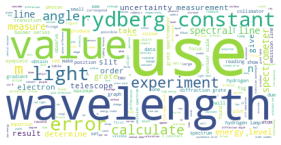

In [4]:
# Visualising the pre-processed text
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df['Content'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
filepath = 'outputs/wordmap.png'
#plt.savefig(filepath)



In [5]:
# ---- Directory name  --------
dir_name_e = r'C:\Users\EfiaA\OneDrive - Imperial College London\Imperial academic work\University life\Y4\MSci project\Project_Coding\nlp-physicseducation\Pickledfiles'

train_sizes = [0.5,0.6,0.7,0.8,0.9]
c = ['r','b','g', 'm'] # colour notation

In [17]:
def ml_results_graph(train_size, df, mlmodel):
    for i in range(4):
        # all of the arrays will be of size 4 for training size graphs anyway
        plt.plot(train_size,df['accuracy'][i], label = '{}-{}-{}'.format(mlmodel,df['feature extraction'][i],df['Label'][i]), color =c[i],marker='o', markersize =1 )
        #plt.scatter(train_size, df['accuracy'][i], 'o', color = c[i])
        plt.errorbar(train_sizes, df['accuracy'][i], yerr = df['sem'][i], elinewidth=0.5, capsize=2, c = 'black', markeredgewidth = 0.5)
    plt.xlabel(' Training size')
    plt.ylabel('Accuracy score')
    plt.legend( prop={'size': 5})
    filepath = 'outputs/comparison-{}-2500epochs-overallgraph_new.png'.format(mlmodel)
    plt.savefig(filepath)
    return 

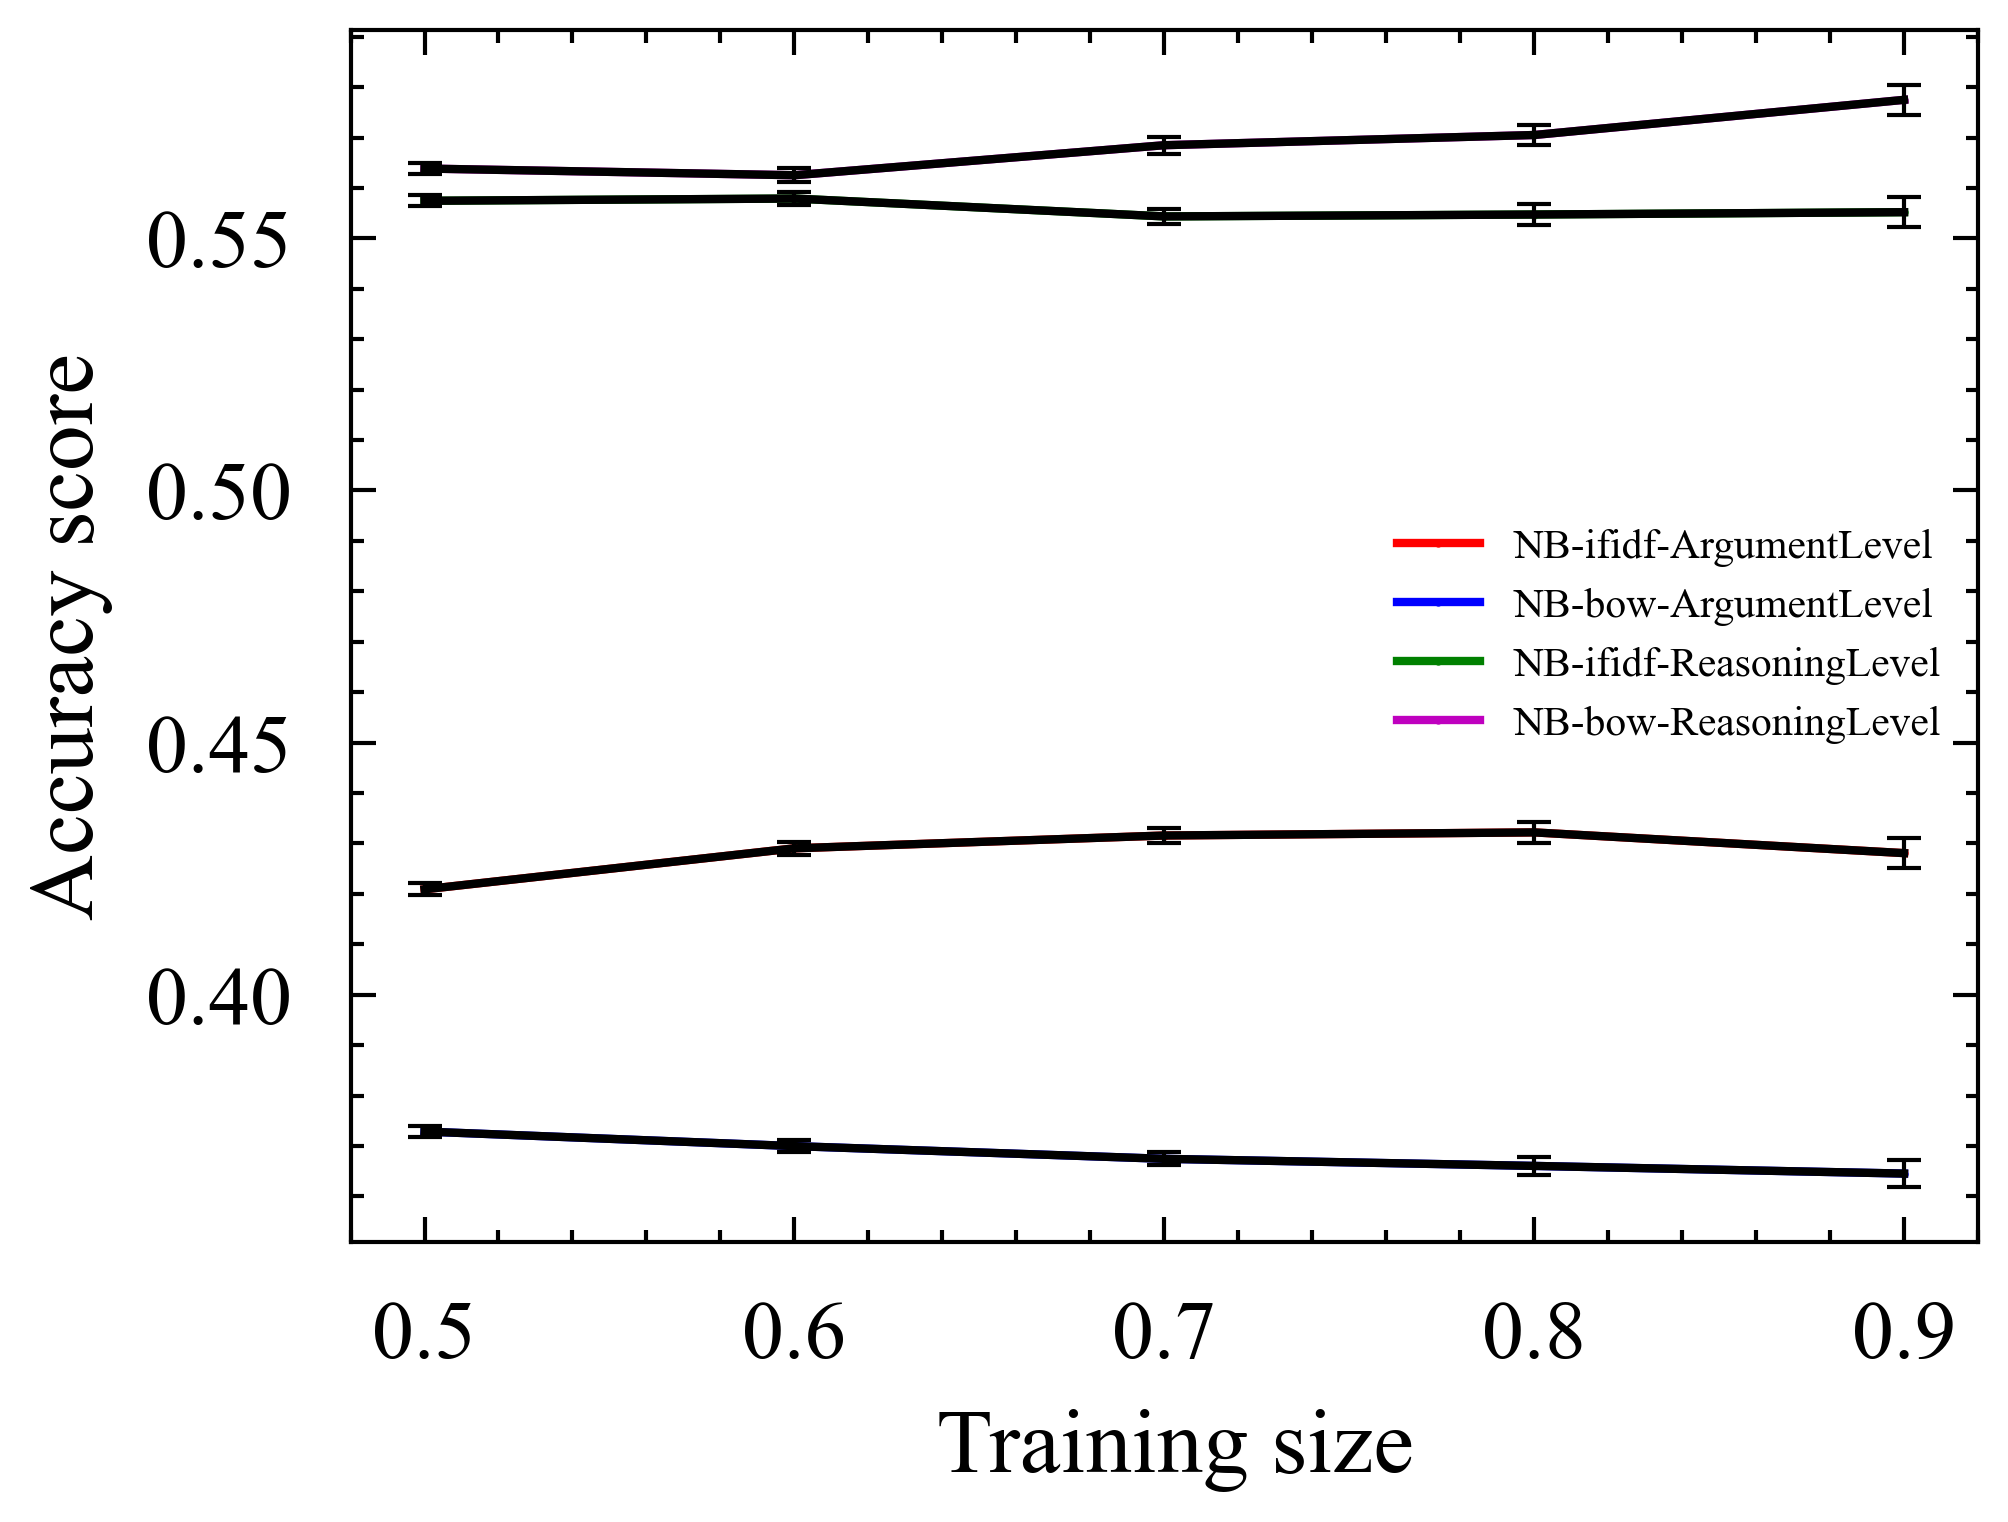

In [18]:
nb_unpickled_df = utils.load_pickle_file_to_df('NB_trainingsize_plot_2500epochs_y1c1c2_sem', dir_name_e)


In [ ]:
df = nb_unpickled_df
plt.plot(train_sizes,df['accuracy'][i], label = '{}-{}-{}'.format(mlmodel,df['feature extraction'][i],df['Label'][i]), color =c[i],marker='o', markersize =1 )
plt.errorbar(train_sizes, df['accuracy'][i], yerr = df['sem'][i], elinewidth=0.5, capsize=2, c = 'black', markeredgewidth = 0.5)

In [62]:
nbh_unpickled_df = utils.load_pickle_file_to_df('NB_trainingsize_arraystopandas_freqhist_2500epochs', dir_name_e)

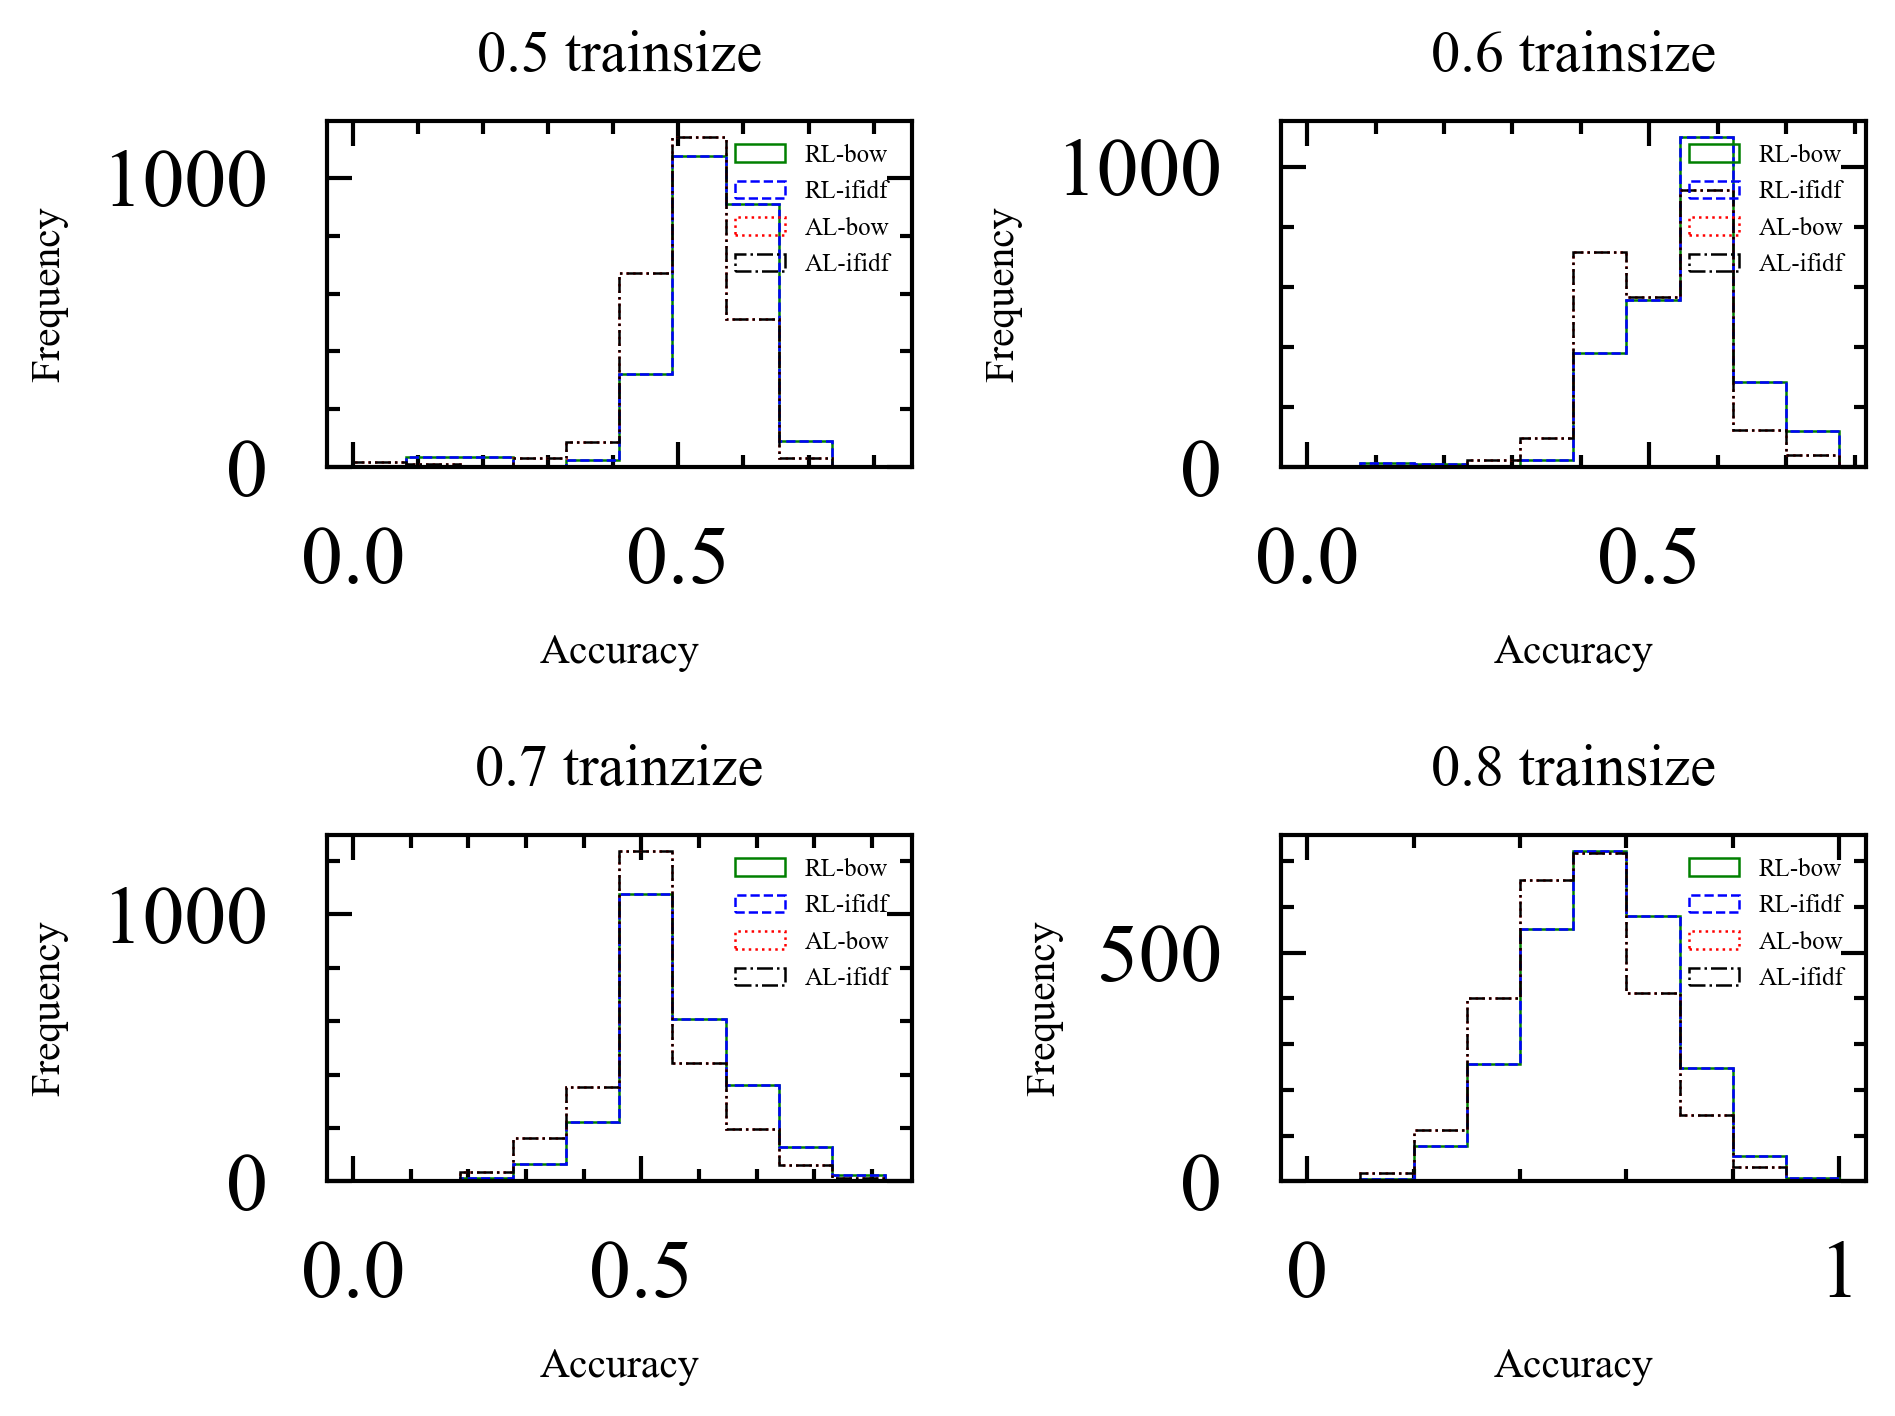

In [63]:
num_epochs = 2500
tsizes_str = ['0.5','0.6','0.7','0.8','0.9']
ft_ext     = ['AL-ifidf', 'AL-bow', 'RL-ifidf', 'RL-bow']
n_bins = 10
x_5 = []
x_6 = []
x_7 = []
x_8 = []
x_9 = []
# for size in tsizes_str:
#     for cell in range(len(nbh_unpickled_df[size])) :
#         #filepath = 'outputs/{}-NB2-{}epochs-freq histograms-{}.png'.format(num_epochs,size,ft_ext[cell]) # ** always change name **
#         #formats.histogram(nbh_unpickled_df[size][cell], 'Accuracy', 'Frequency', filepath, size)
#         #plt.hist(nbh_unpickled_df[size])

for size in tsizes_str:
    for cell in range(len(nbh_unpickled_df[size])):
        if size == '0.5':
            x_5.append(nbh_unpickled_df[size][cell])
        if size == '0.6':
            x_6.append(nbh_unpickled_df[size][cell])
        if size == '0.7':
            x_7.append(nbh_unpickled_df[size][cell])
        if size == '0.8':
            x_8.append(nbh_unpickled_df[size][cell])
        if size == '0.9':
            x_9.append(nbh_unpickled_df[size][cell])

fig, axes = plt.subplots(2,2)
ax0, ax1, ax2, ax3 = axes.flatten()

colors = ['red', 'tan', 'lime', 'magenta']

ax0.hist(x_5, n_bins, histtype='step', fill=False, label=ft_ext)
ax0.legend(prop={'size': 3})
ax0.set_title('0.5 trainsize', fontsize = 7)
ax0.set_ylabel('Frequency', fontsize = 5)
ax0.set_xlabel('Accuracy', fontsize = 5)

ax1.hist(x_6, n_bins,  histtype='step', fill=False, label=ft_ext)
ax1.legend(prop={'size': 3})
ax1.set_title('0.6 trainsize', fontsize = 7)
ax1.set_ylabel('Frequency', fontsize = 5)
ax1.set_xlabel('Accuracy', fontsize = 5)

ax2.hist(x_7, n_bins, histtype='step',  fill=False,label=ft_ext)
ax2.legend(prop={'size': 3})
ax2.set_title('0.7 trainzize',fontsize = 7)
ax2.set_ylabel('Frequency', fontsize = 5)
ax2.set_xlabel('Accuracy', fontsize = 5)


ax3.hist(x_8, n_bins,  histtype='step',fill=False,label=ft_ext)
ax3.legend(prop={'size': 3})
ax3.set_title('0.8 trainsize', fontsize = 7)
ax3.set_ylabel('Frequency', fontsize = 5)
ax3.set_xlabel('Accuracy', fontsize = 5)

# ax4.subplot(1,1)
# ax4.hist(x_9, n_bins,  histtype='step', stacked=True, fill=False,label=ft_ext)
# ax4.legend(prop={'size': 3})
# ax4.set_title('0.9 trainsize', fontsize = 7)

fig.tight_layout()
plt.show()


In [19]:
# getting the means and the variance
import numpy as np
mean_5 = np.mean(x_5)
std_5  = np.std(x_5)
mean_6 = np.mean(x_6)
std_6  = np.std(x_6)
mean_7 = np.mean(x_7)
std_7  = np.std(x_7)
mean_8 = np.mean(x_8)
std_8  = np.std(x_8)
mean_9 = np.mean(x_9)
std_9  = np.std(x_9)


# Mean and trainsize
print('Mean for 0.5 trainsize:', mean_5, 'standard deviation for 0.5 trainsize:', std_5)
print('Mean for 0.6 trainsize:', mean_6, 'standard deviation for 0.6 trainsize:', std_6)
print('Mean for 0.7 trainsize:', mean_7, 'standard deviation for 0.7 trainsize:', std_7)
print('Mean for 0.8 trainsize:', mean_8, 'standard deviation for 0.8 trainsize:', std_8)
print('Mean for 0.9 trainsize:', mean_9, 'standard deviation for 0.9 trainsize:', std_9)

# justification for the no of epochs 
'''
Shown is that for each train size for the naive bayes classifier, most accuracy values are 0.5.
An accuracy value of 0.5 means that there is no bias per say. 
'''

Mean for 0.5 trainsize: 0.5212363636363636 standard deviation for 0.5 trainsize: 0.09255469859172444
Mean for 0.6 trainsize: 0.5279444444444444 standard deviation for 0.6 trainsize: 0.09722049204809692
Mean for 0.7 trainsize: 0.5346615384615385 standard deviation for 0.7 trainsize: 0.1195989263967962
Mean for 0.8 trainsize: 0.5307333333333333 standard deviation for 0.8 trainsize: 0.15073042079516139
Mean for 0.9 trainsize: 0.52712 standard deviation for 0.9 trainsize: 0.211850196129246


In [6]:
rf_unpickled_df = utils.load_pickle_file_to_df('RF_trainingsize_plot_2500epochs_y1c1c2_sem', dir_name_e)
#rfgraph = ml_results_graph(train_sizes, rf_unpickled_df, 'RF')

In [5]:
svm_unpickled_df = utils.load_pickle_file_to_df('SVM_trainingsize_plot_2500epochs_y1c1c2_sem', dir_name_e)
#svmgraph = ml_results_graph(train_sizes, svm_unpickled_df, 'SV')

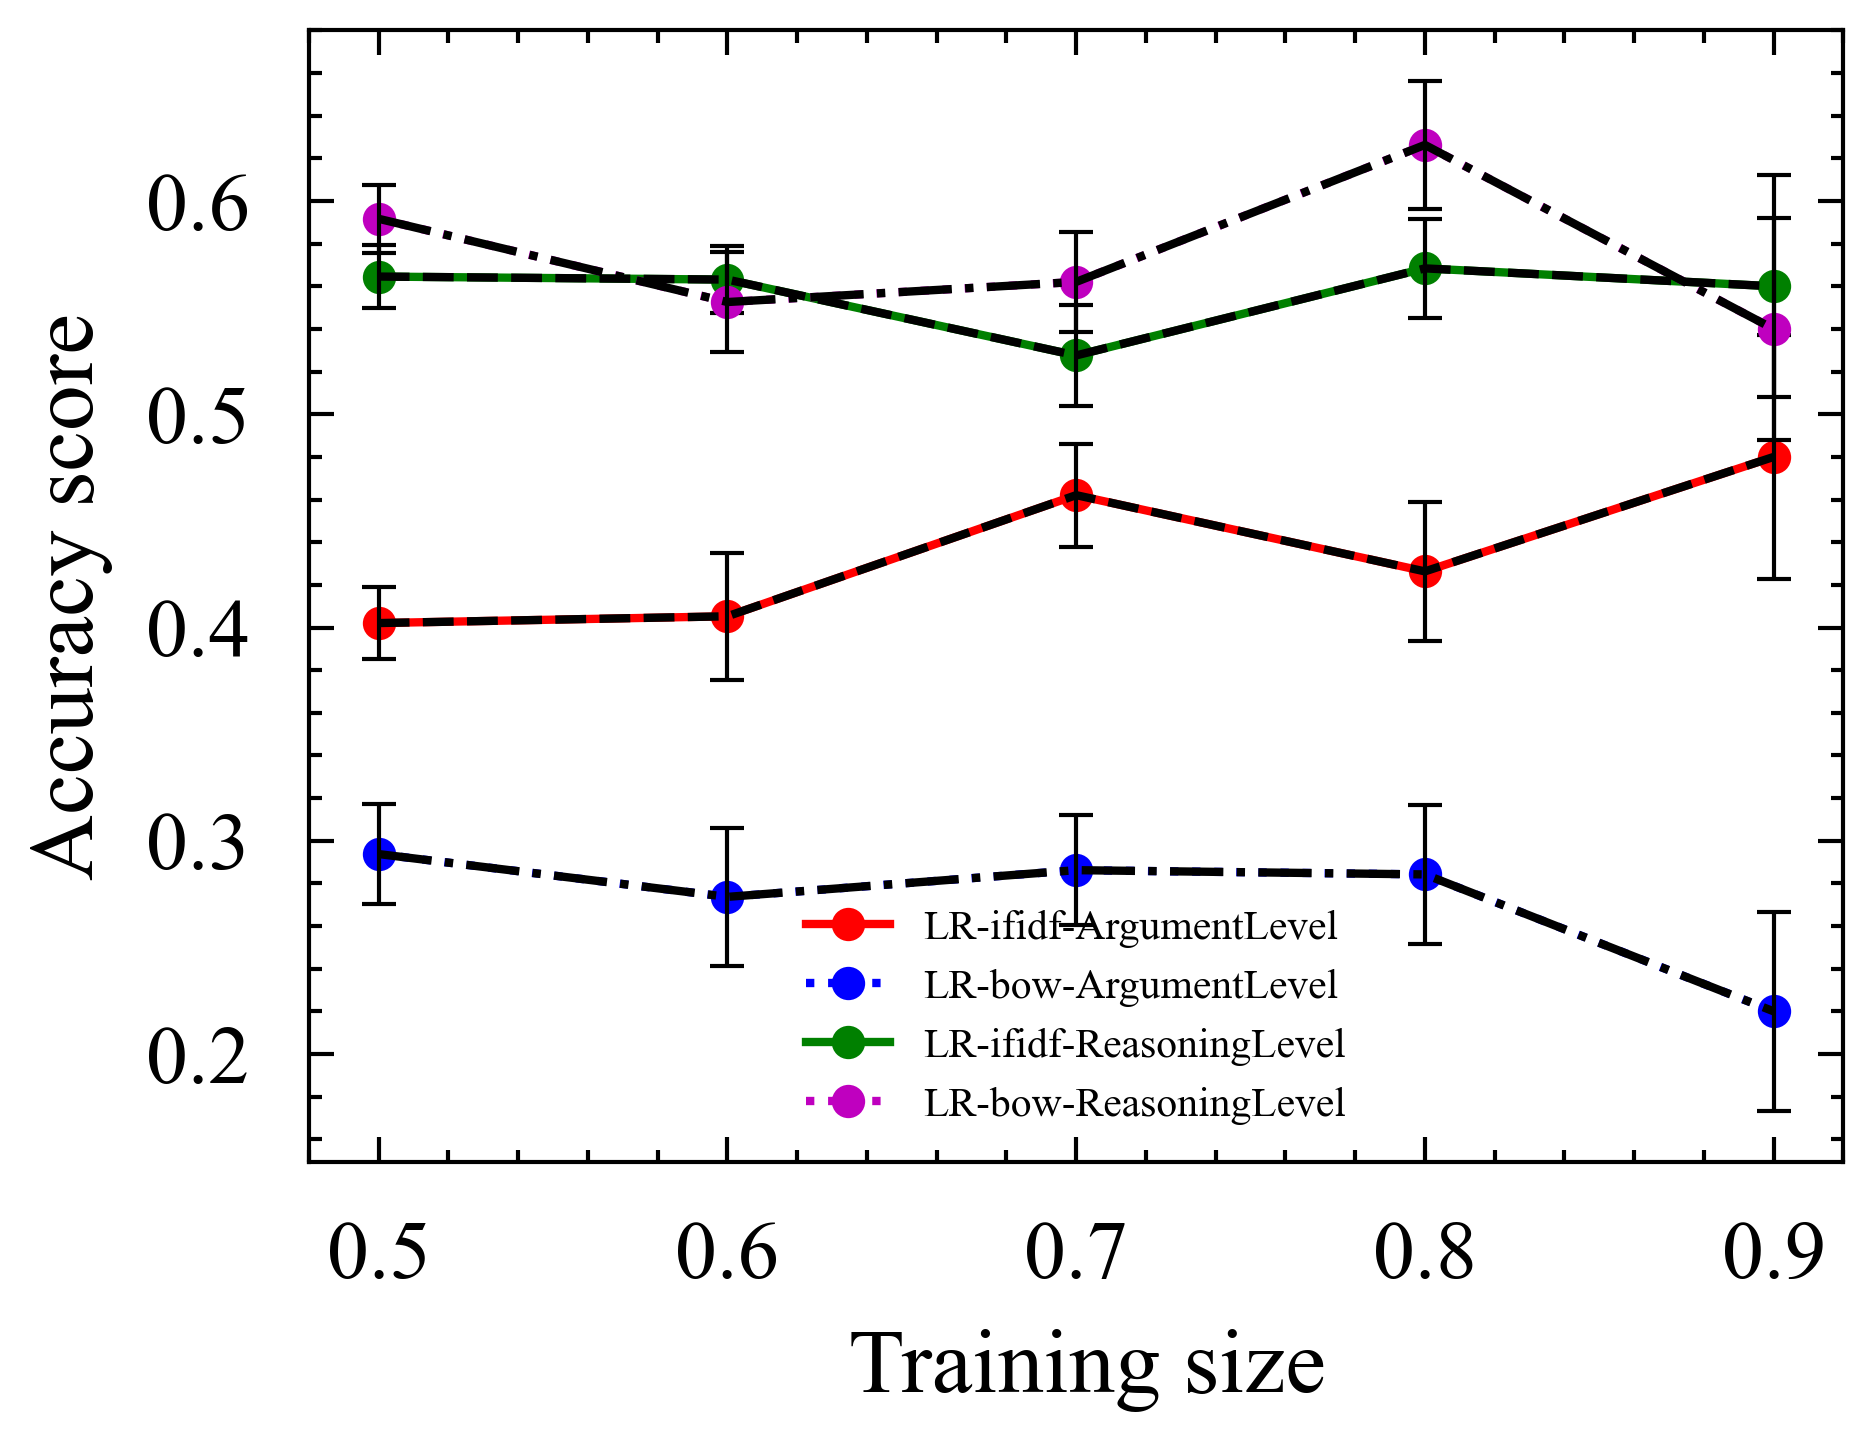

In [65]:
lr_unpickled_df = utils.load_pickle_file_to_df('LR_trainingsize_plot_500epochs_y1c1c2_sem', dir_name_e)
lrgraph = ml_results_graph(train_sizes, lr_unpickled_df, 'LR')

Text(0, 0.5, 'Accuracy score')

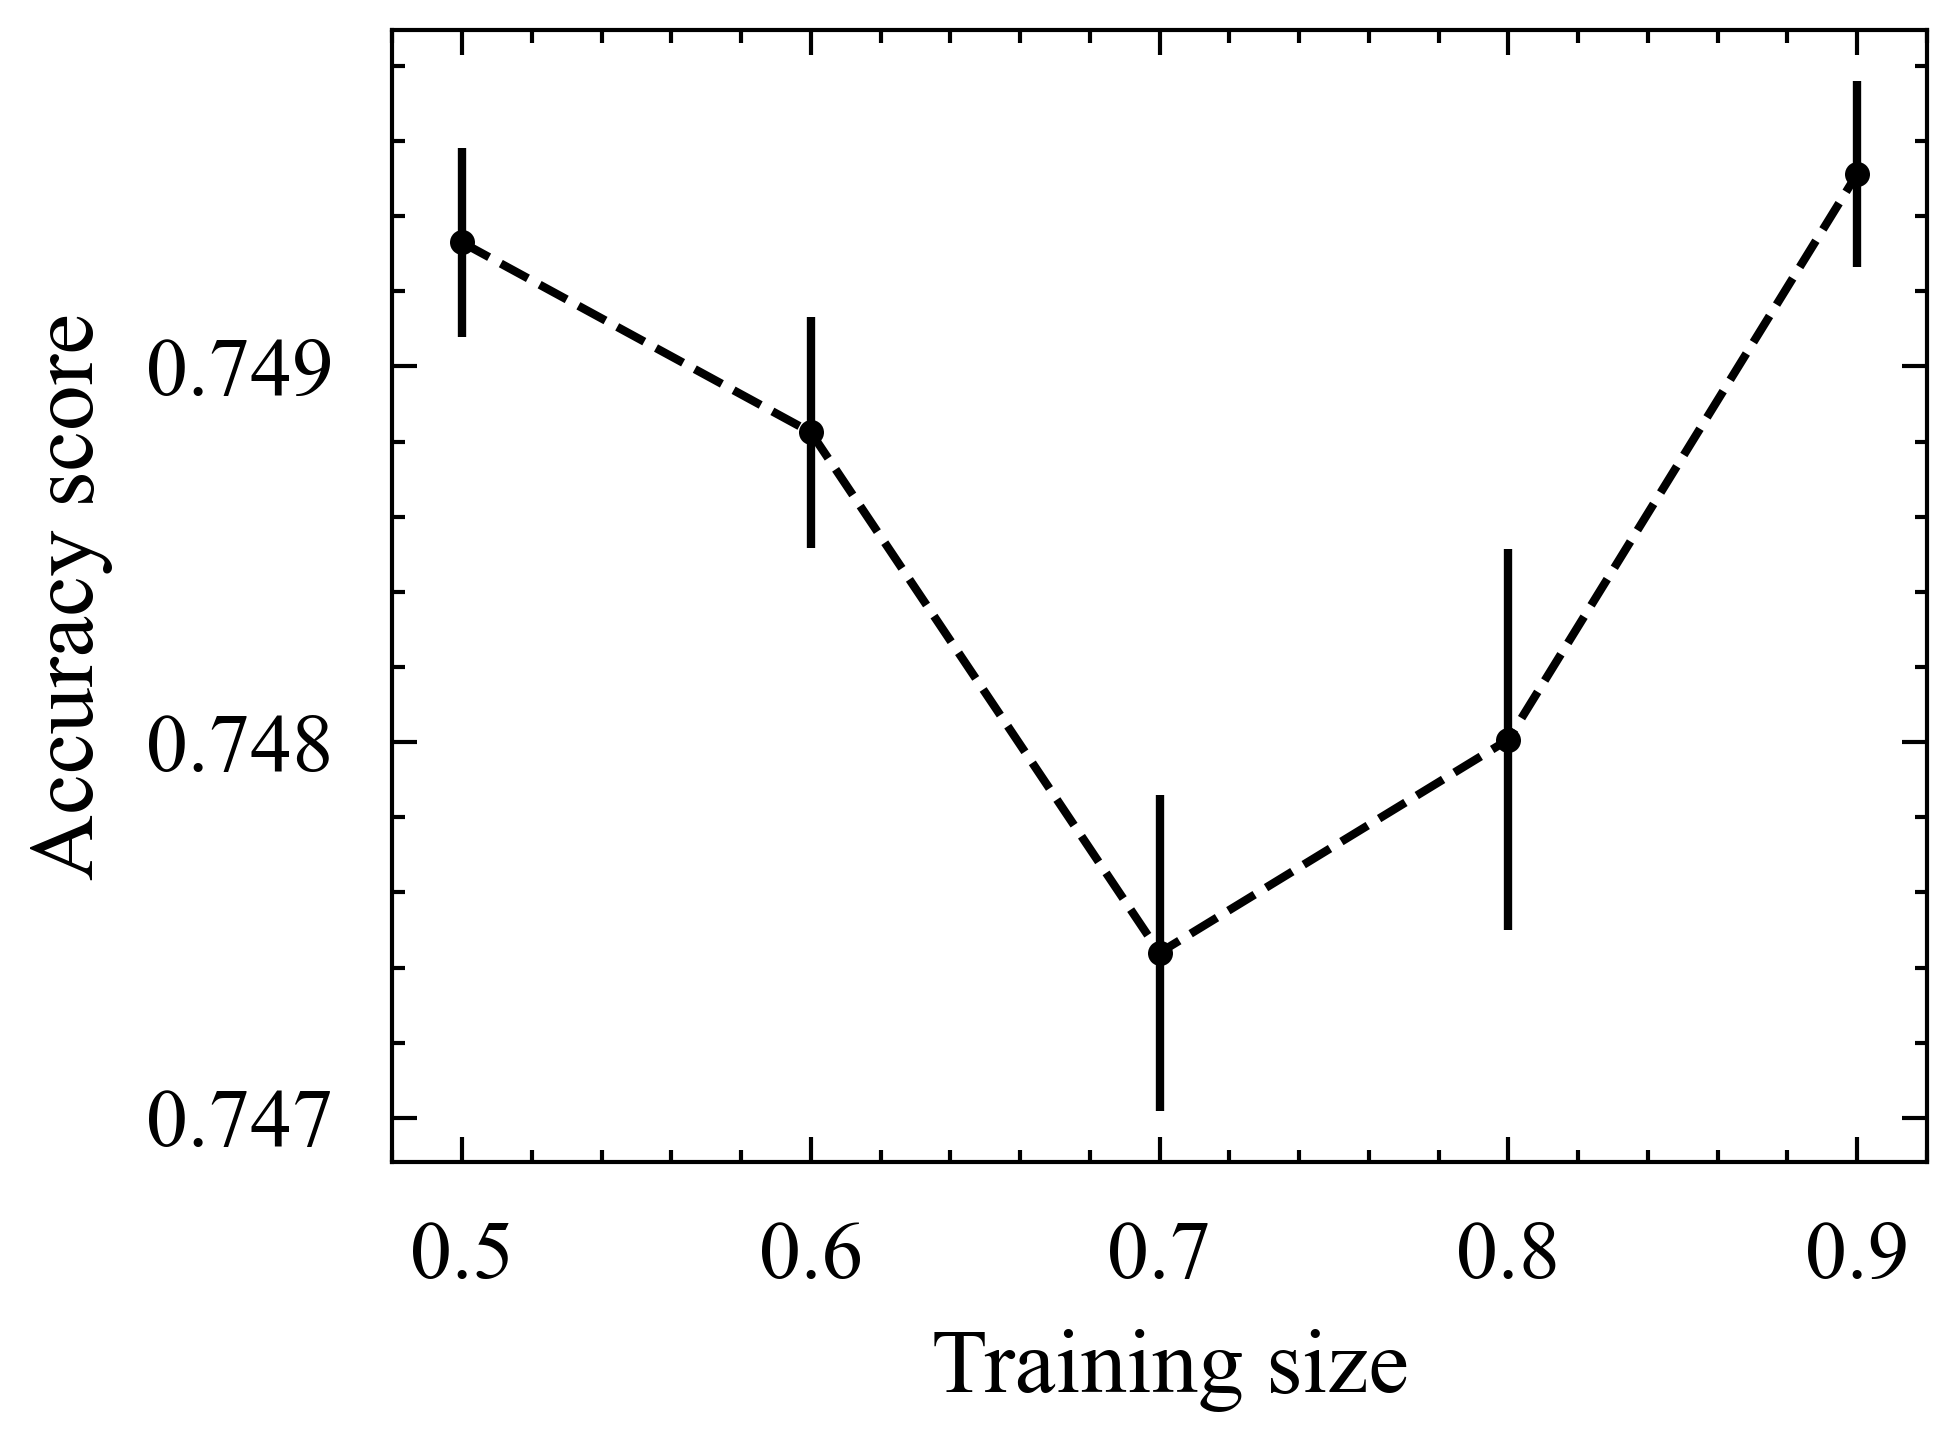

In [67]:
#===========================================================================================================================================
#                                                               UNPICKLE: RL-BOW
#===========================================================================================================================================
unpickled_rl_bow_df = utils.load_pickle_file_to_df('NN_bow_rl_trainsize_accuracy_sem_1000ephs',dir_name_e)
plt.plot(unpickled_rl_bow_df['trainsize'], unpickled_rl_bow_df['accuracy'], 'o', markersize= 3)
plt.errorbar(unpickled_rl_bow_df['trainsize'], unpickled_rl_bow_df['accuracy'], yerr = unpickled_rl_bow_df['sem'], elinewidth=1, color = 'black' )
plt.xlabel(' Training size')
plt.ylabel('Accuracy score')


# save figure 
# filepath = 'outputs/NN-RL-BOW-1000ephs_NEW'
# plt.savefig(filepath)

Text(0, 0.5, 'Accuracy score')

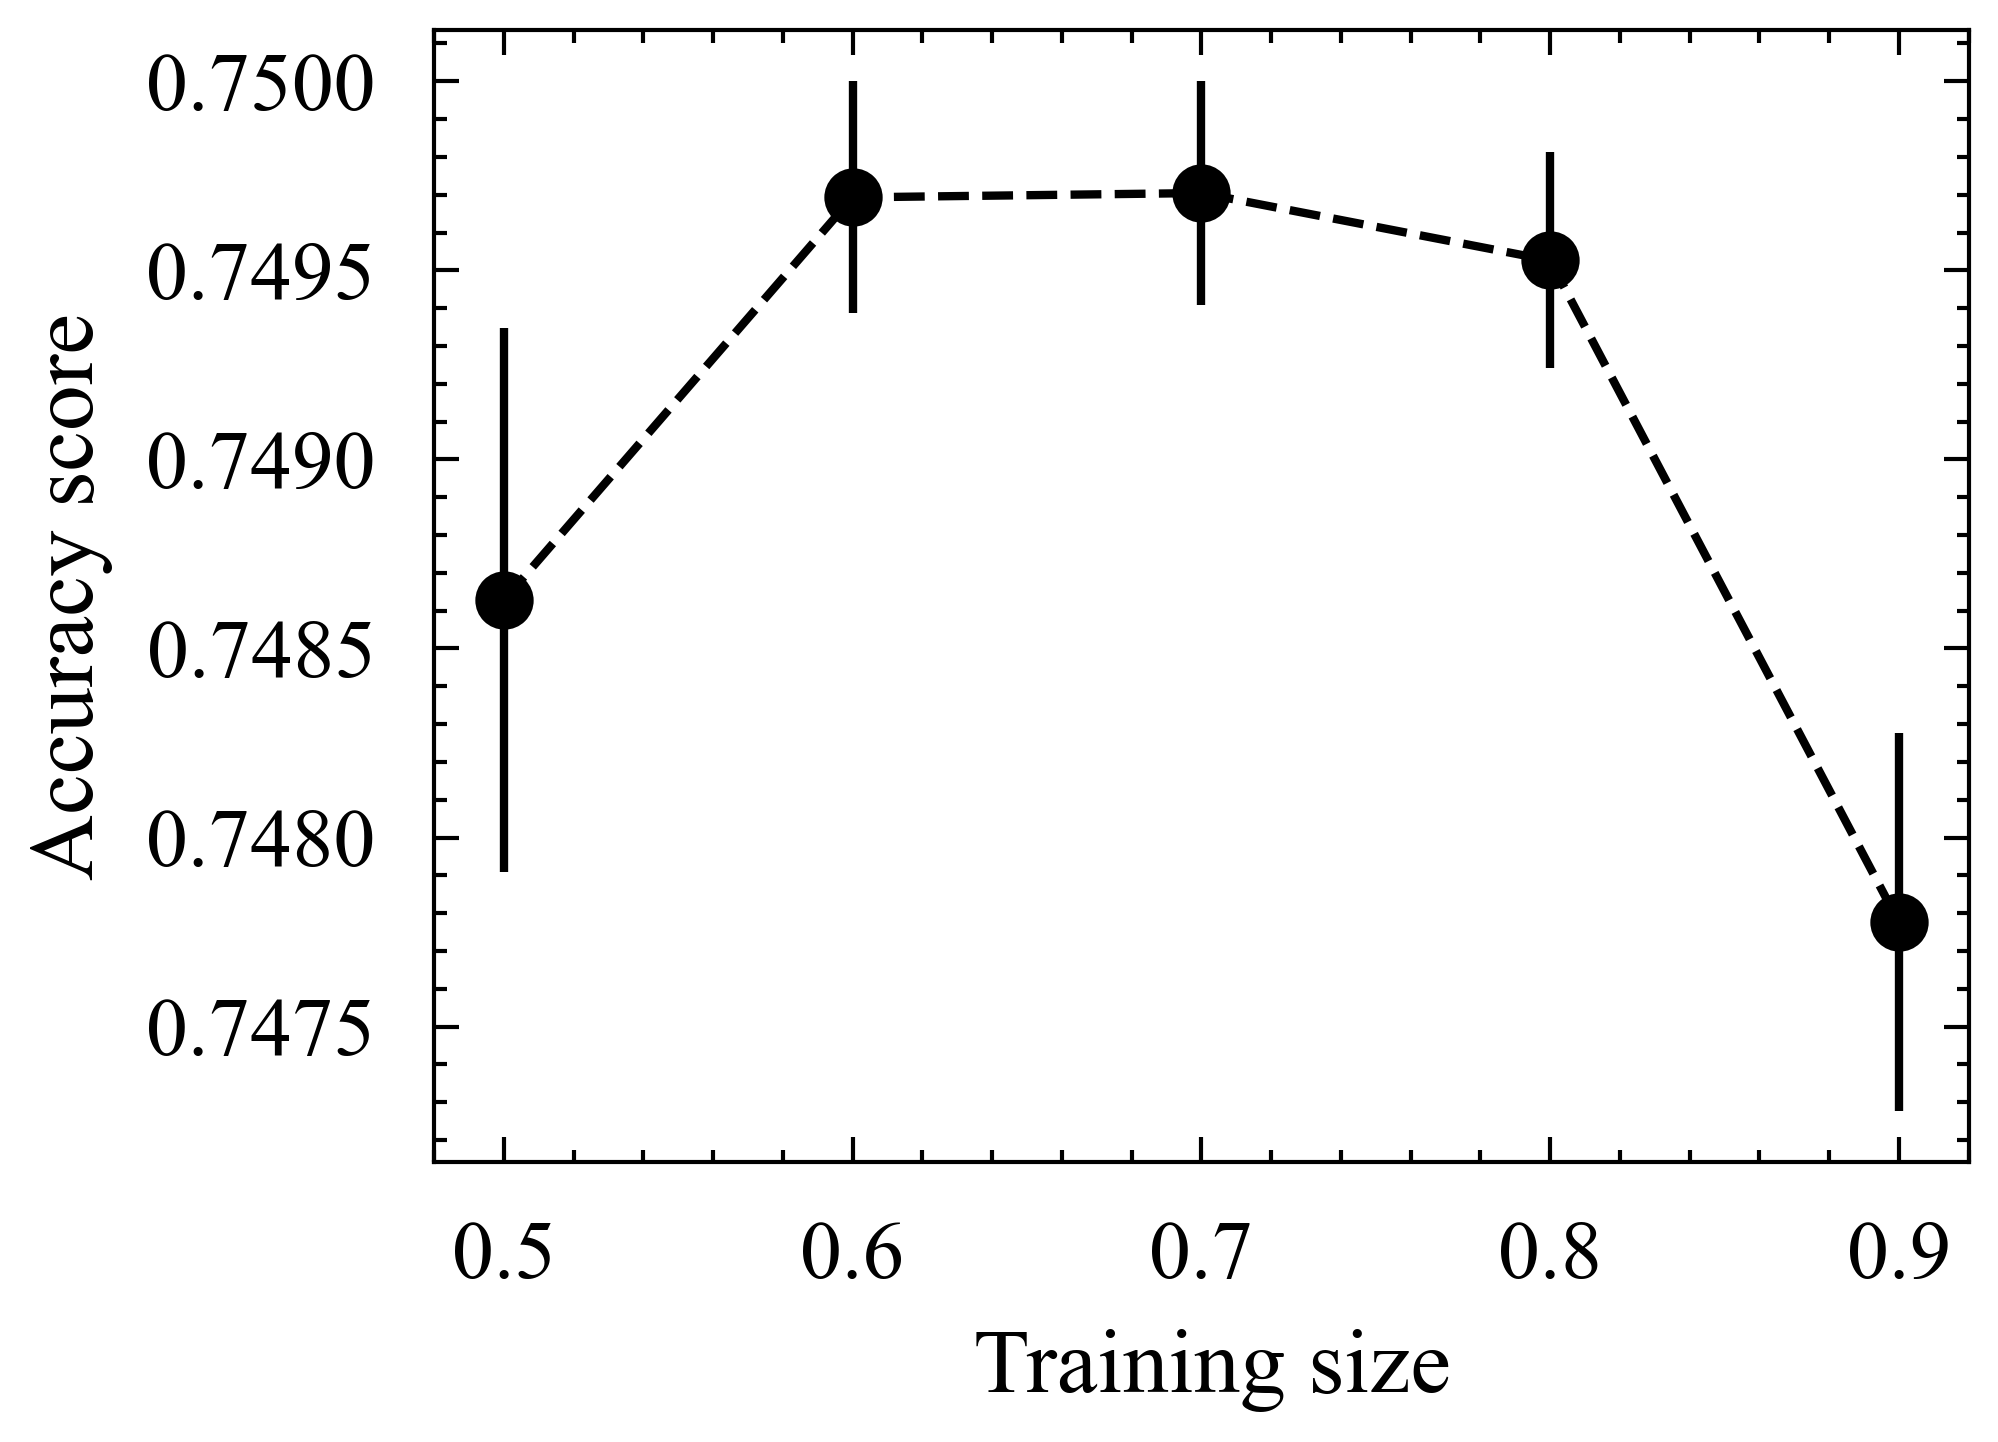

In [73]:
#===========================================================================================================================================
#                                                               UNPICKLE: AL-BOW
#===========================================================================================================================================
unpickled_al_bow = utils.load_pickle_file_to_df('NN_bow_al_trainsize_accuracy_sem_1000ephs',dir_name_e)
plt.plot(unpickled_al_bow['trainsize'], unpickled_al_bow['accuracy'], 'o')
plt.errorbar(unpickled_al_bow['trainsize'], unpickled_al_bow['accuracy'], yerr = unpickled_al_bow['sem'], markersize=0.5, capsize=20, elinewidth=1, color= 'black' )
plt.xlabel(' Training size')
plt.ylabel('Accuracy score')

#---- save the figure ----
# filepath = 'outputs/NN-AL-BOW-1000ephs_NEW'
# plt.savefig(filepath)

Text(0, 0.5, 'Accuracy score')

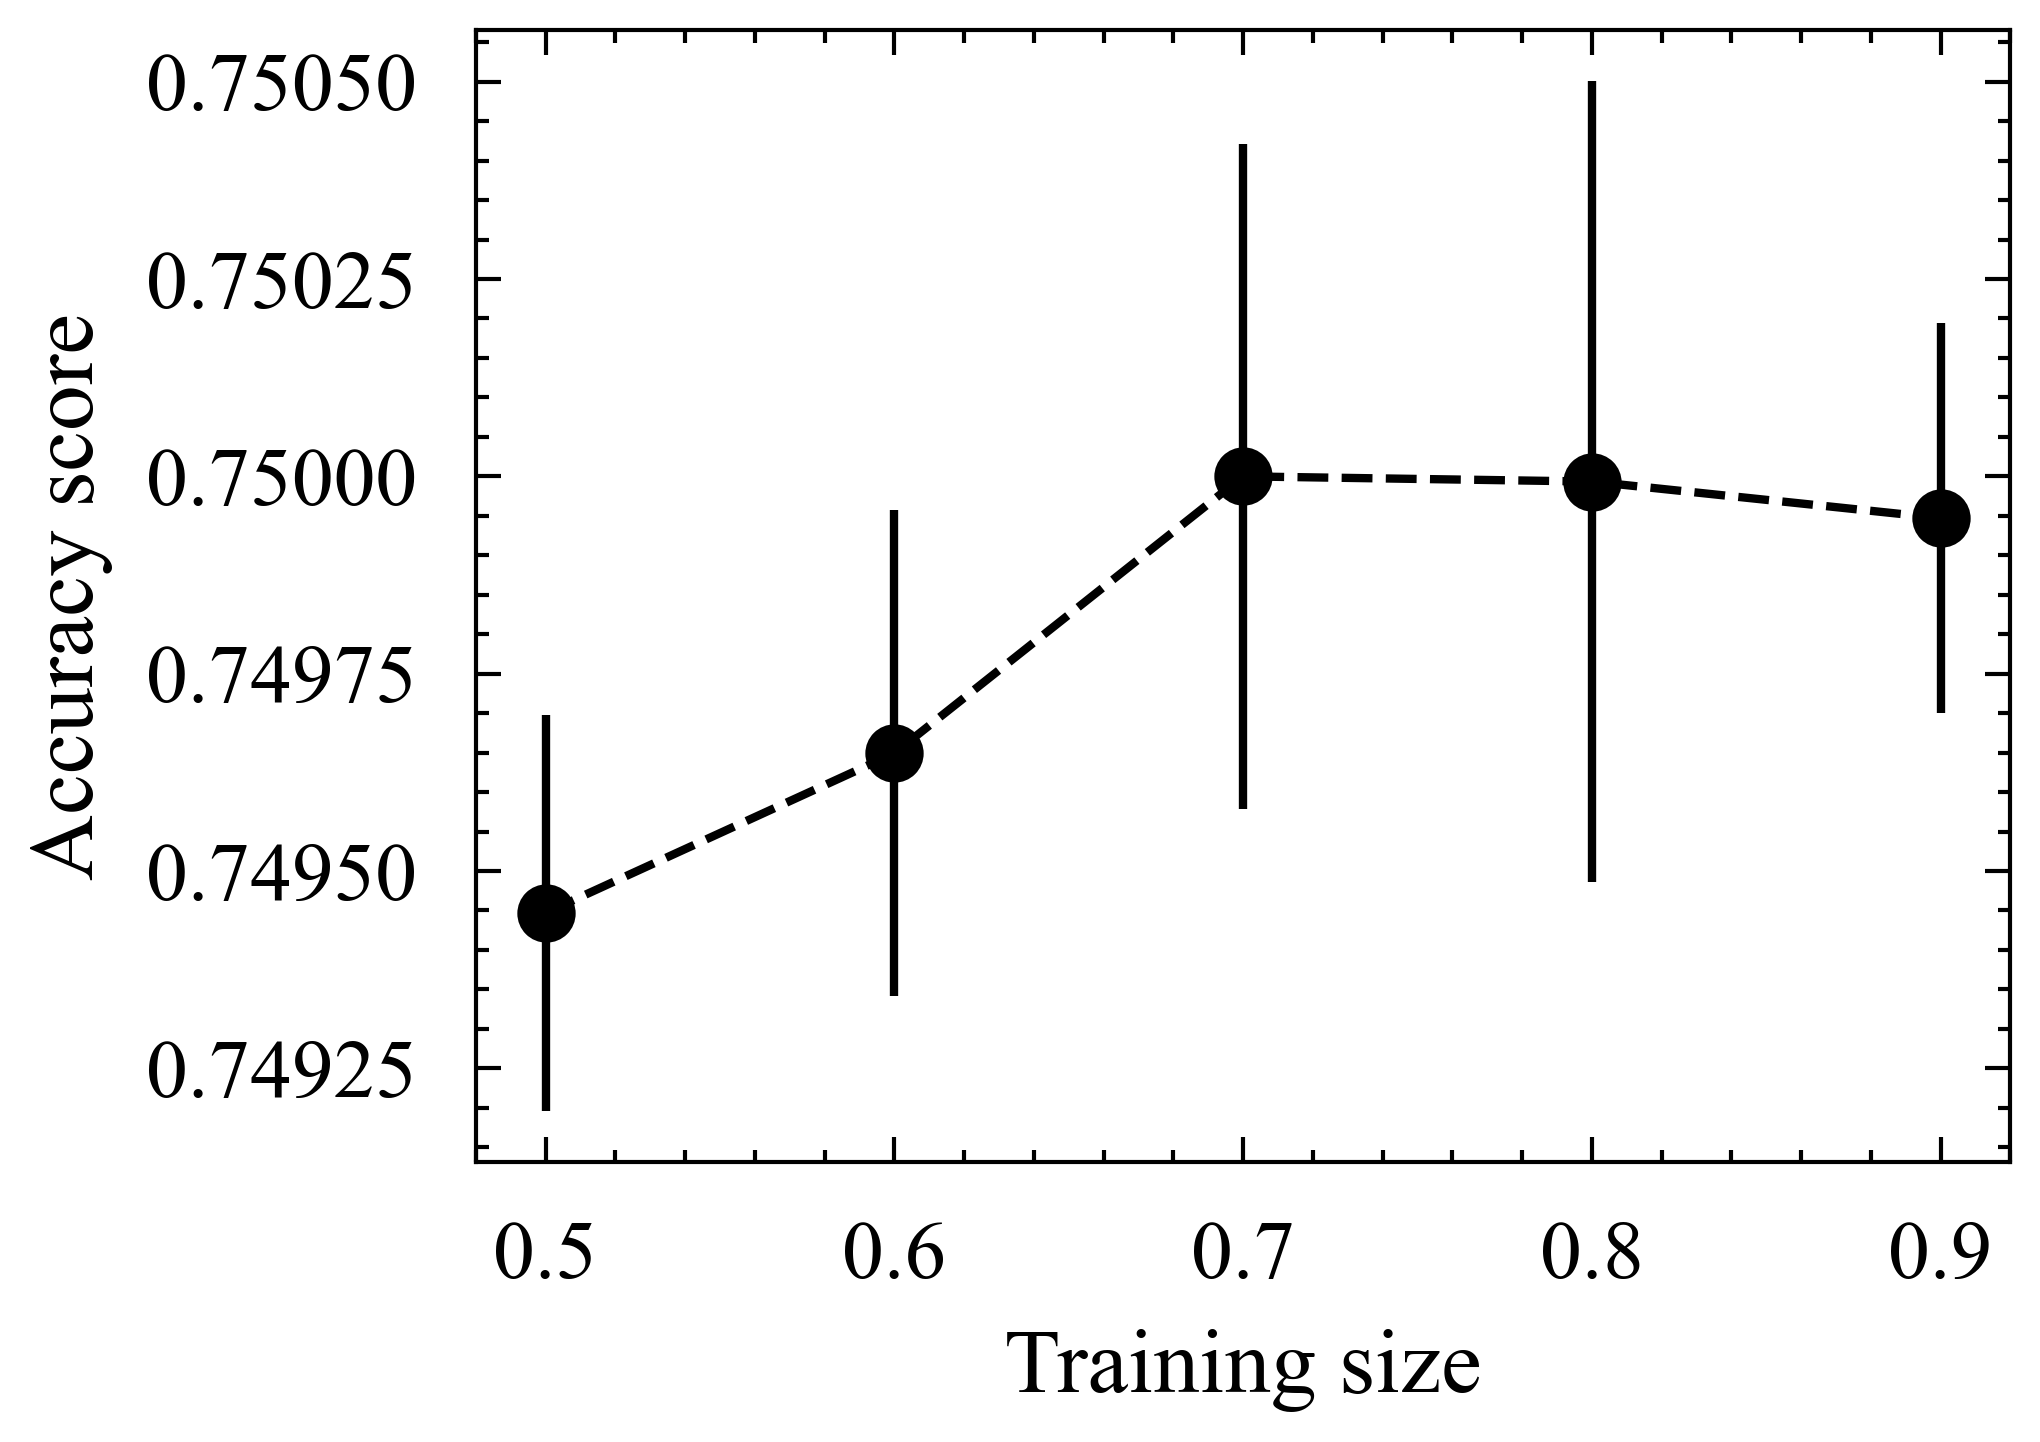

In [68]:
#===========================================================================================================================================
#                                                               UNPICKLE: RL- TFIDF
#===========================================================================================================================================
unpickled_rl_tfidf = utils.load_pickle_file_to_df('NN_tfidf_rl_trainsize_accuracy_sem_1000ephs',dir_name_e)
#----- TTF-IDF, RL, graph ------
plt.plot(unpickled_rl_tfidf['trainsize'], unpickled_rl_tfidf['accuracy'], 'o')
plt.errorbar(unpickled_rl_tfidf['trainsize'],unpickled_rl_tfidf['accuracy'], yerr = unpickled_rl_bow_df['sem'], markersize=0.5, capsize=3, elinewidth=1, color= 'black' )
plt.xlabel('Training size')
plt.ylabel('Accuracy score')

# --- save the graph
# filepath = 'outputs/NN-TFIDF-RL-1000ephs_NEW'
# plt.savefig(filepath)

Text(0, 0.5, 'Accuracy score')

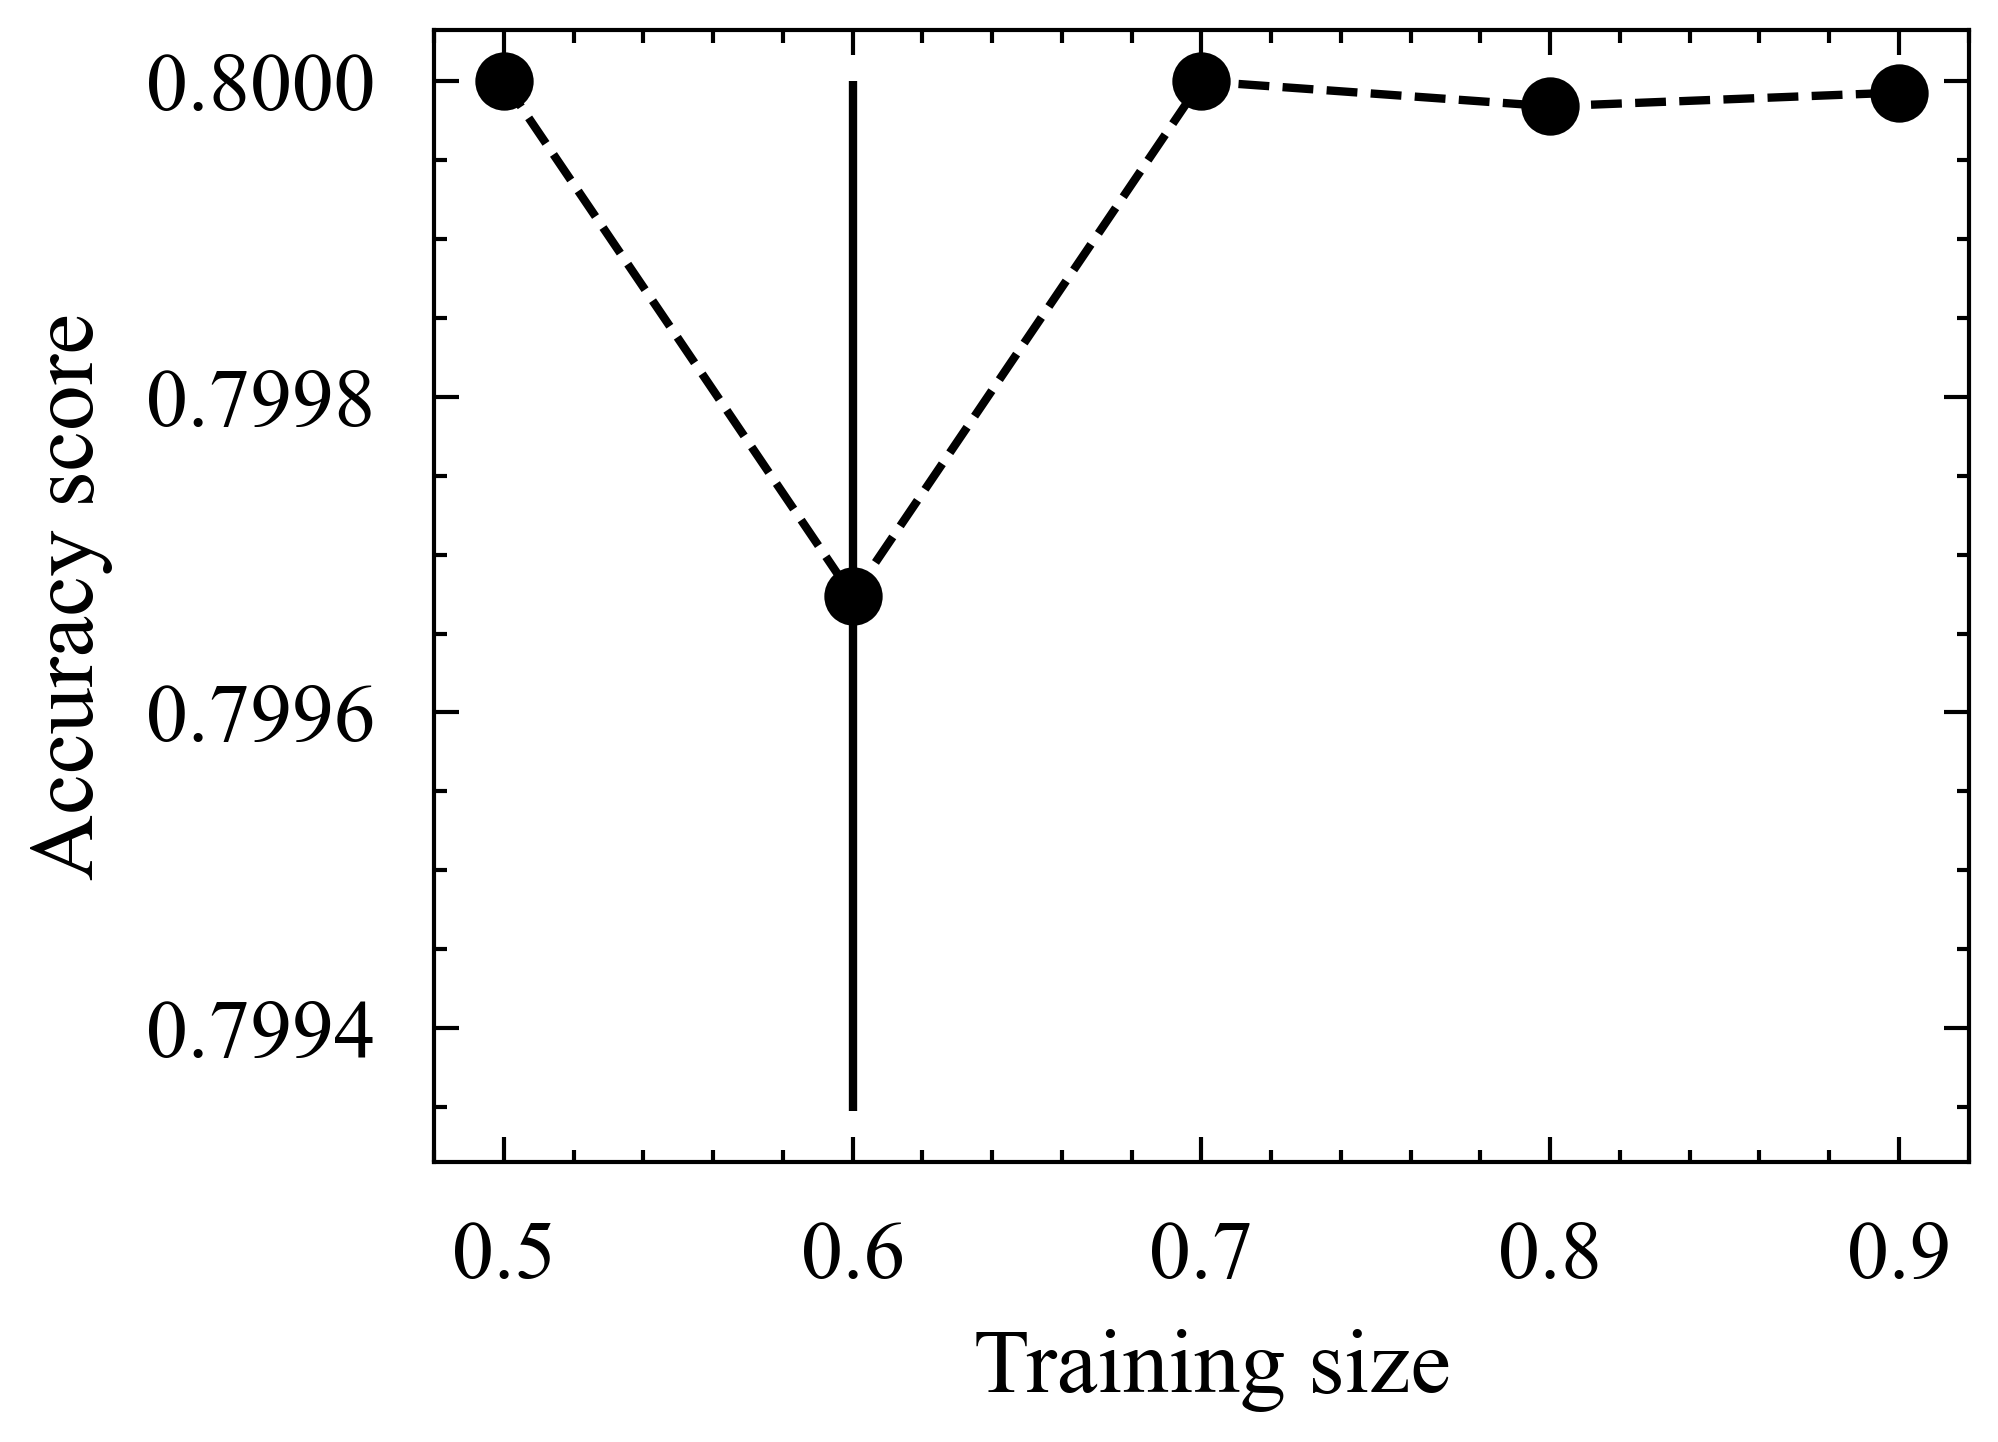

In [71]:
#===========================================================================================================================================
#                                                               UNPICKLE: AL- TFIDF
#===========================================================================================================================================
unpickled_al_tfidf = utils.load_pickle_file_to_df('NN_tfidf_al_trainsize_accuracy_sem_1000ephs',dir_name_e)
#----- tfidf, AL, graph, plotting  ------
plt.plot(unpickled_al_tfidf['trainsize'], unpickled_al_tfidf['accuracy'], 'o')
plt.errorbar(unpickled_al_tfidf['trainsize'], unpickled_al_tfidf['accuracy'], yerr = unpickled_al_tfidf['sem'], markersize=0.5, capsize=3, elinewidth=1, color= 'black' )
plt.xlabel(' Training size')
plt.ylabel('Accuracy score')


# # --- save graphs 
# filepath = 'outputs/NN-TFIDF-AL-1000ephs_NEW'
# plt.savefig(filepath)

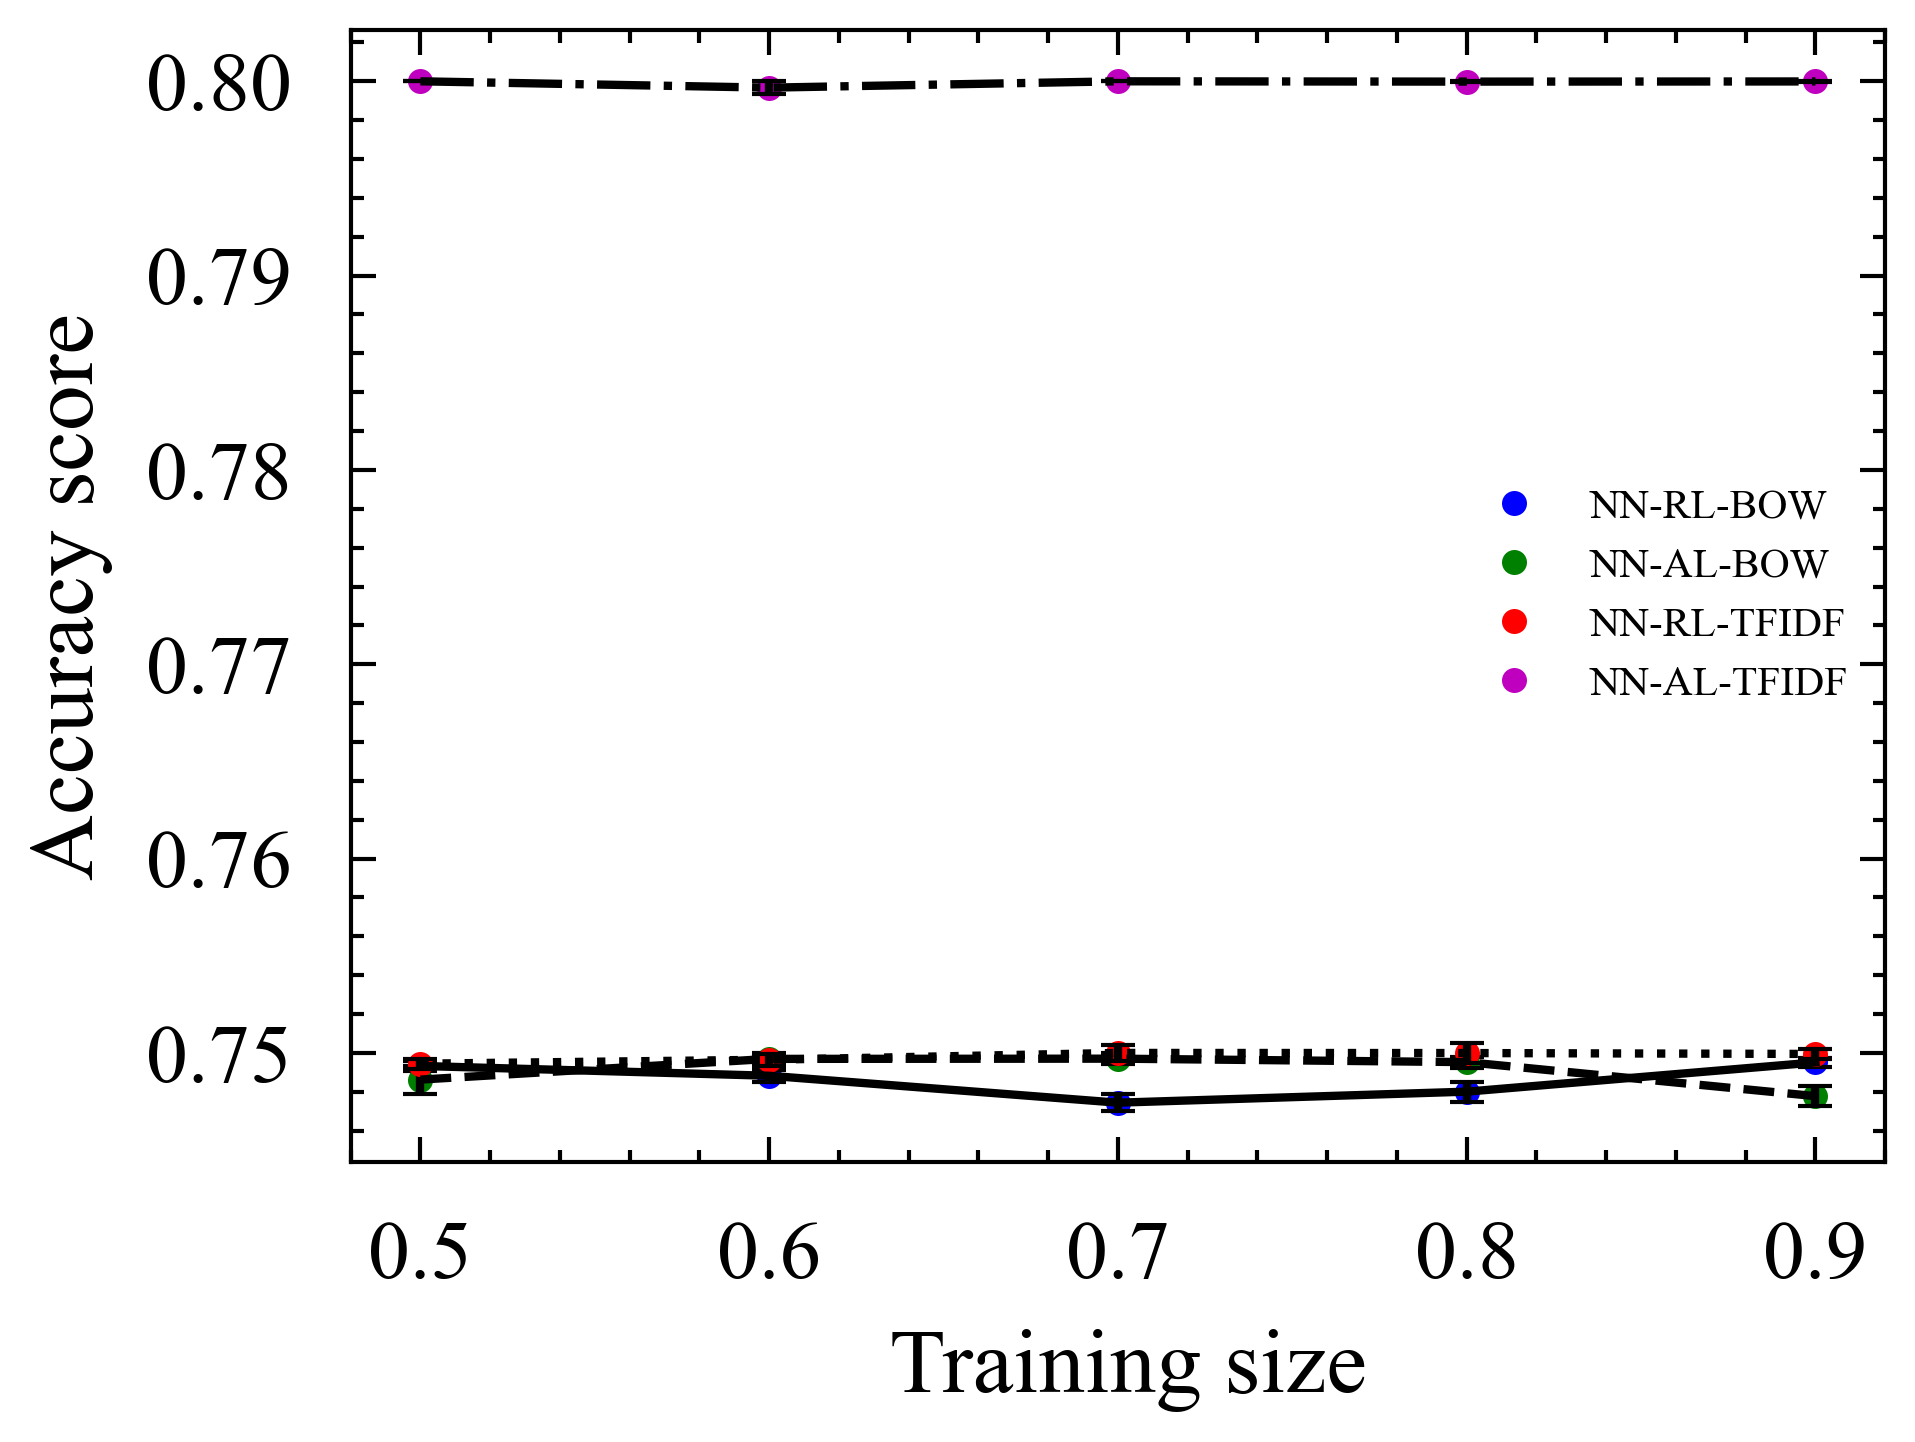

In [76]:
# ----- All NN graphs together 
plt.plot(unpickled_rl_bow_df['trainsize'], unpickled_rl_bow_df['accuracy'], 'o', label = 'NN-RL-BOW', color = 'b', markersize = 3)
plt.errorbar(unpickled_rl_bow_df['trainsize'], unpickled_rl_bow_df['accuracy'], yerr = unpickled_rl_bow_df['sem'], elinewidth=1, capsize=2, c = 'black', markeredgewidth = 0.5 )

plt.plot(unpickled_al_bow['trainsize'], unpickled_al_bow['accuracy'], 'o', label = 'NN-AL-BOW', color = 'g',markersize = 3)
plt.errorbar(unpickled_al_bow['trainsize'], unpickled_al_bow['accuracy'], yerr = unpickled_al_bow['sem'],  elinewidth=1,  capsize=2, c = 'black', markeredgewidth = 0.5 )

plt.plot(unpickled_rl_tfidf['trainsize'], unpickled_rl_tfidf['accuracy'], 'o', label = 'NN-RL-TFIDF', color = 'r',markersize = 3)
plt.errorbar(unpickled_rl_tfidf['trainsize'],unpickled_rl_tfidf['accuracy'], yerr = unpickled_rl_bow_df['sem'], elinewidth=1,  capsize=2, c = 'black', markeredgewidth = 0.5 )

plt.plot(unpickled_al_tfidf['trainsize'], unpickled_al_tfidf['accuracy'], 'o', label = 'NN-AL-TFIDF', color = 'm', markersize = 3)
plt.errorbar(unpickled_al_tfidf['trainsize'], unpickled_al_tfidf['accuracy'], yerr = unpickled_al_tfidf['sem'],  elinewidth=1,  capsize=2, c = 'black', markeredgewidth = 0.5 )

plt.xlabel(' Training size')
plt.ylabel('Accuracy score')
plt.legend(prop={'size': 5})

filepath = 'outputs/NN-TFIDF-AL-1000ephs_NEW'
plt.savefig(filepath)

# Year 2 graphs


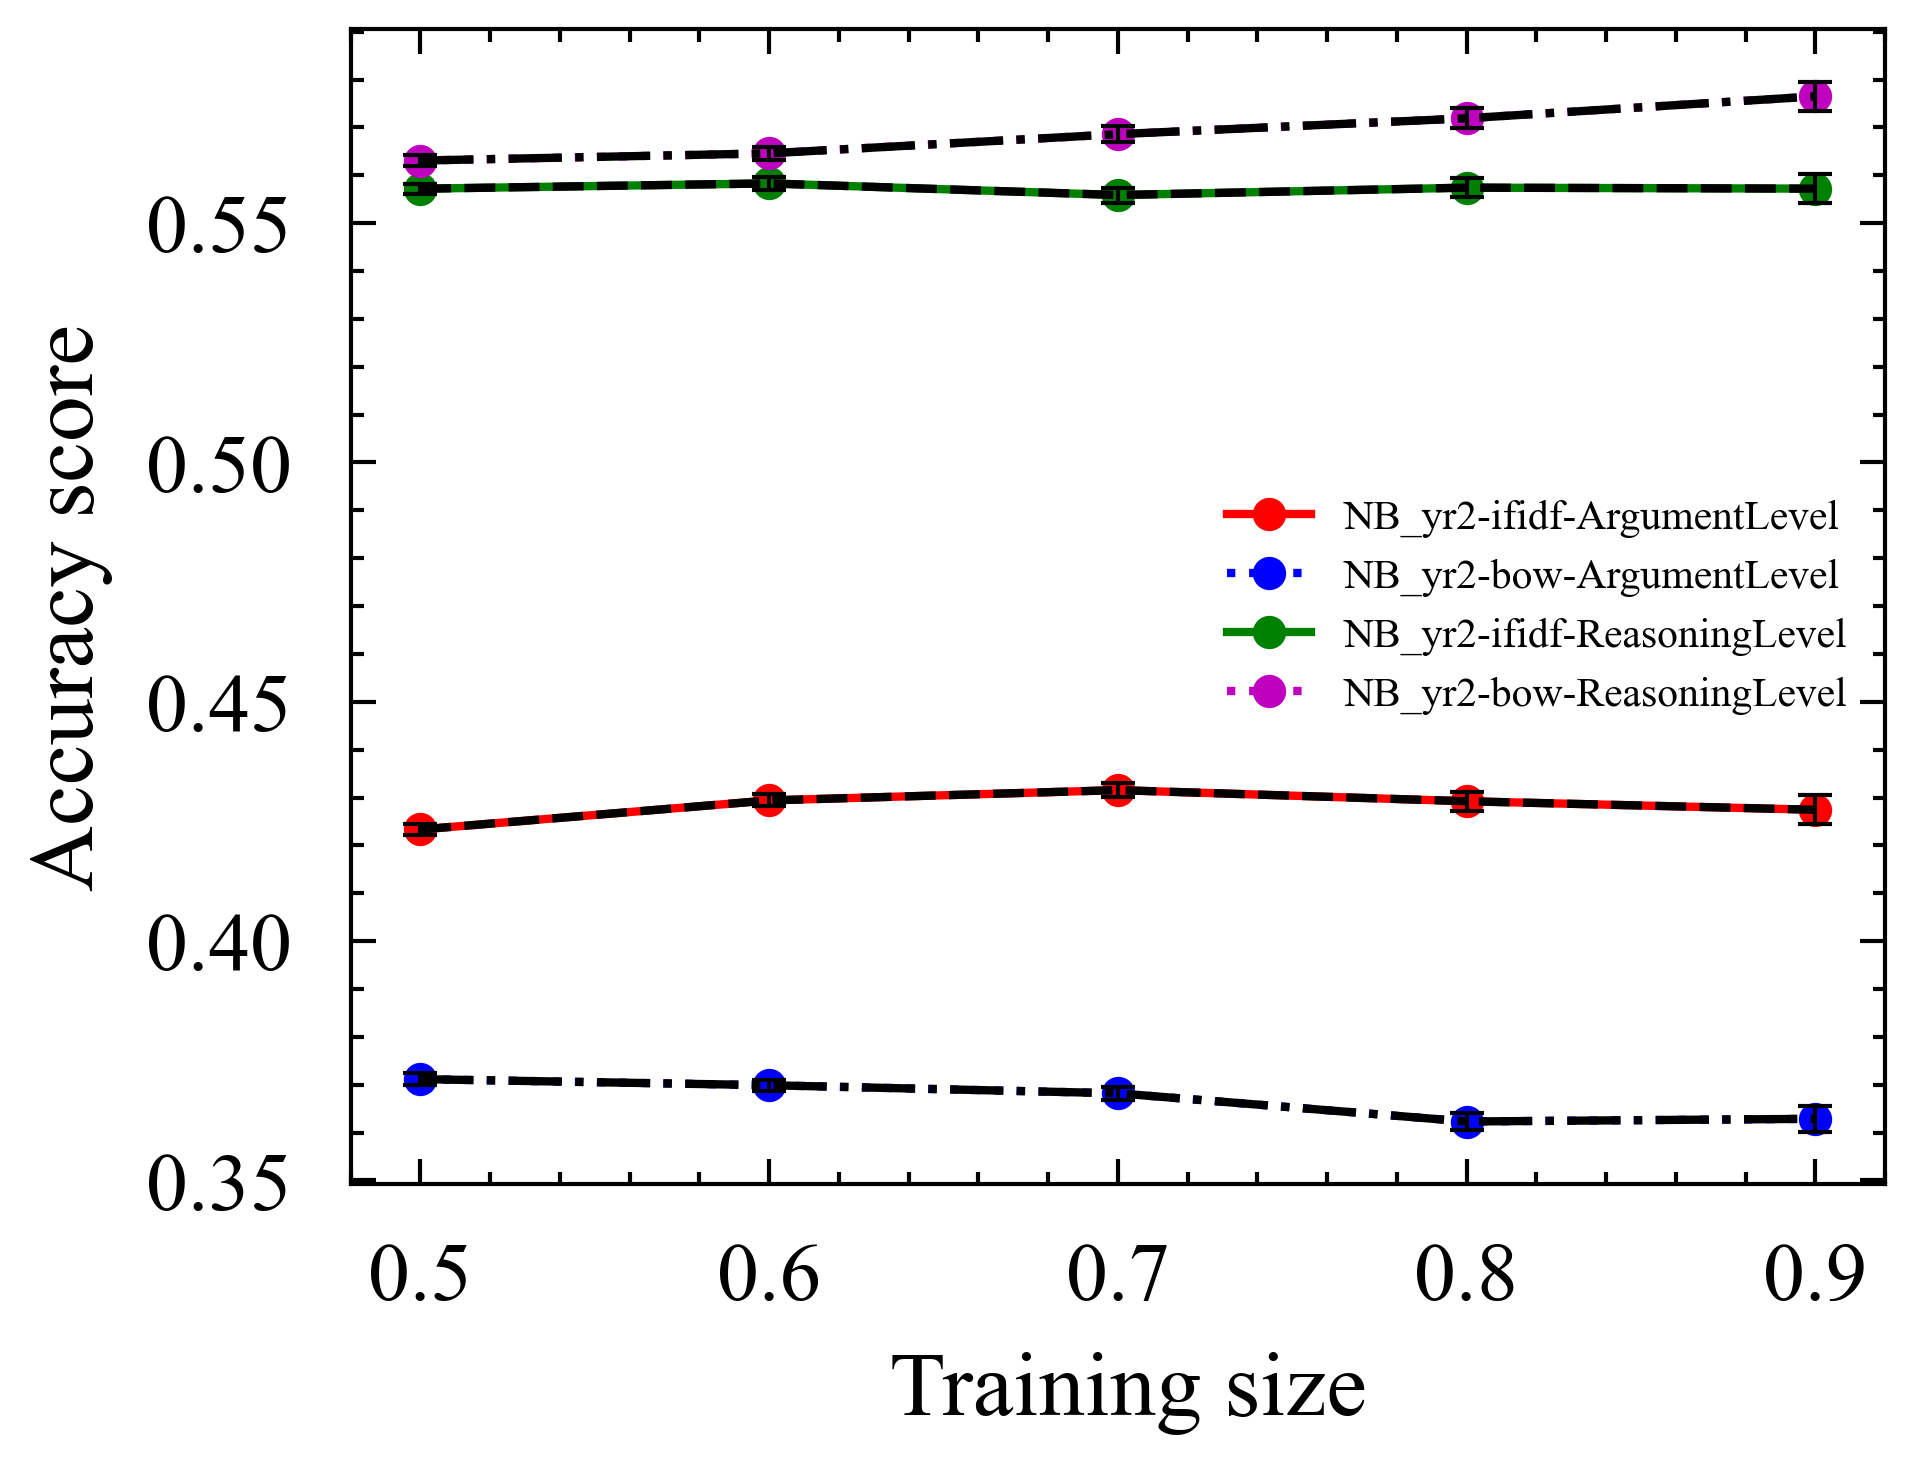

In [10]:

unpickled_NB_y2 = utils.load_pickle_file_to_df('NB_trainingsize_plot_2500epochs_y2_sem',dir_name_e)
nbgraph_y2 = ml_results_graph(train_sizes, unpickled_NB_y2, 'NB_yr2')

## 1. ALL YEAR 1 Datasets together

In [5]:
# YEAR 1 graphs

#NB
# file paths 
path_nb = 'outputs/NB_y1_csv_file.csv'
nb_unpickled_df = utils.load_pickle_file_to_df('NB_trainingsize_plot_2500epochs_y1c1c2_sem', dir_name_e)
nb_unpickled_df['feature extraction'] = ['tfidf', 'bow', 'tfidf', 'bow'] # correcting a spelling mistake 
nb_unpickled_df.to_csv(path_nb,  encoding='utf-8')

#RF
path_rf = 'outputs/RF_y1_csv_file.csv'
rf_unpickled_df = utils.load_pickle_file_to_df('RF_trainingsize_plot_2500epochs_y1c1c2_sem', dir_name_e)
rf_unpickled_df['feature extraction'] = ['tfidf', 'bow', 'tfidf', 'bow']
rf_unpickled_df.to_csv(path_rf,  encoding='utf-8')


#LR
path_lr = 'outputs/LR_y1_csv_file.csv'
lr_unpickled_df = utils.load_pickle_file_to_df('LR_trainingsize_plot_500epochs_y1c1c2_sem', dir_name_e)
lr_unpickled_df['feature extraction'] = ['tfidf', 'bow', 'tfidf', 'bow']
lr_unpickled_df.to_csv(path_lr, encoding = 'utf-8')


#SVM
path_svm = 'outputs/SVM_y1_csv_file.csv'
svm_unpickled_df = utils.load_pickle_file_to_df('SVM_trainingsize_plot_2500epochs_y1c1c2_sem', dir_name_e)
svm_unpickled_df['feature extraction'] = ['tfidf', 'bow', 'tfidf', 'bow']
svm_unpickled_df.to_csv(path_svm, encoding = 'utf-8')

# NN 
#name_df_nn_y1  = 'W5_NN_y1_RESULTS_DF_20ephs_60iterations'
path_nn= 'outputs/NN_y1_csv_file.csv'
# train size = 0.3 - 0.9
name_df_nn_y1 = 'W9_NN_y1_RESULTS_DF_10ephs_40iterations_fulltrainsizeset'
unpickle_df_nn_y1 = utils.load_pickle_file_to_df(name_df_nn_y1, dir_name_e)
unpickle_df_nn_y1.to_csv(path_nn, encoding = 'utf-8')


#LDA 
file_name_y1 = 'outputs/LDA_weights_grades_df_year1.csv'
df_y1        = pd.read_csv(file_name_y1, encoding='utf-8')




## 2. ALL YEAR 2 Datasets together

In [10]:

# NB
unpickle_df_y2 = utils.load_pickle_file_to_df('NB_trainingsize_plot_2500epochs_y2_sem', dir_name_e)
unpickle_df_y2['feature extraction'] = ['tfidf', 'bow', 'tfidf', 'bow']
path_nb = 'outputs/NB_y2_csv_file.csv'
unpickle_df_y2.to_csv(path_nb,  encoding='utf-8')

# RF
unpickle_df_y2_rf = utils.load_pickle_file_to_df('RF_trainingsize_plot_2500epochs_y2_sem', dir_name_e)
unpickle_df_y2_rf['feature extraction'] = ['tfidf', 'bow', 'tfidf', 'bow']
path_rf = 'outputs/RF_y2_csv_file.csv'
unpickle_df_y2_rf.to_csv(path_rf,  encoding='utf-8')

#LR
unpickle_df2_lr = utils.load_pickle_file_to_df('LR_trainingsize_plot_500epochs_y2_sem', dir_name_e)
unpickle_df2_lr['feature extraction'] = ['tfidf', 'bow', 'tfidf', 'bow']
path_lr = 'outputs/LR_y2_csv_file.csv'
unpickle_df2_lr.to_csv(path_lr,  encoding='utf-8')


# NN 
#name_df_nn_y2  = 'W5_NN_Y2_RESULTS_DF_20ephs_60iterations'
name_df_nn_y2  = 'W9_NN_Y2_RESULTS_DF_10ephs_40iterations_fulltrainsize'
unpickle_df_nn_y2 = utils.load_pickle_file_to_df(name_df_nn_y2, dir_name_e)
path_nn = 'outputs/NN_y2_csv_file.csv'
unpickle_df_nn_y2.to_csv(path_nn,  encoding='utf-8')


#LDA
file_name_y2 = 'outputs/LDA_weights_grades_df_year2.csv'
df_y2      = pd.read_csv(file_name_y2, encoding='utf-8')
#df_y2.to_csv(file_name_y2,  encoding='utf-8')

In [11]:
# SVM
unpickle_df2_svm = utils.load_pickle_file_to_df('SVM_trainingsize_plot_2500epochs_y2_sem', dir_name_e)
unpickle_df2_svm['feature extraction'] = ['tfidf', 'bow', 'tfidf', 'bow']
path_svm = 'outputs/SVM_y2_csv_file.csv'
unpickle_df2_svm.to_csv(path_lr,  encoding='utf-8')


## ALL YEAR 1&2 Combined Datasets together 

### Here all the datasets for year 1, year 2 and year 3 are collated and made into tables so that all the results can be compared.

In [9]:
#NB
unpickle_df_y1y2_nb = utils.load_pickle_file_to_df('NB_trainingsize_plot_2500epochs_y1y2_sem', dir_name_e)
unpickle_df_y1y2_nb['feature extraction'] = ['tfidf', 'bow', 'tfidf', 'bow']
path_nb= 'outputs/NB_y1y2_csv_file.csv'
unpickle_df_y1y2_nb.to_csv(path_nb,  encoding='utf-8')

#RF
unpickle_df_y1y2_rf = utils.load_pickle_file_to_df('RF_trainingsize_plot_2500epochs_y1y2_sem', dir_name_e)
unpickle_df_y1y2_rf['feature extraction'] = ['tfidf', 'bow', 'tfidf', 'bow']
path_rf= 'outputs/RF_y1y2_csv_file.csv'
unpickle_df_y1y2_rf.to_csv(path_rf,  encoding='utf-8')

#LR
unpickle_df3_lr = utils.load_pickle_file_to_df('LR_trainingsize_plot_500epochs_y1y2_sem', dir_name_e)
unpickle_df3_lr['feature extraction'] = ['tfidf', 'bow', 'tfidf', 'bow']
path_lr = 'outputs/LR_y1y2_csv_file.csv'
unpickle_df3_lr.to_csv(path_lr, encoding = 'utf-8')

# SVM
unpickle_df3_svm = utils.load_pickle_file_to_df('SVM_trainingsize_plot_2500epochs_y1y2_sem', dir_name_e)
unpickle_df3_svm['feature extraction'] = ['tfidf', 'bow', 'tfidf', 'bow']
path_svm = 'outputs/SVM_y1y2_csv_file.csv'
unpickle_df3_svm.to_csv(path_svm, encoding = 'utf-8')

#NN 
#name_df_nn_y1y2  = 'W5_NN_Y1Y2_RESULTS_DF_20ephs_60iterations'
name_df_nn_y1y2  = 'W9_NN_Y1Y2_RESULTS_DF_10ephs_40iterations_fulltrainsize'
unpickle_df_nn_y1y2 = utils.load_pickle_file_to_df(name_df_nn_y1y2, dir_name_e)
path_nn = 'outputs/NN_y1y2_csv_file.csv'
unpickle_df_nn_y1y2.to_csv(path_nn, encoding = 'utf-8')


## Summary table for trainsize: 0.8

In [14]:
from tabulate import tabulate
import itertools

In [11]:
# nb_rl_bow_acc_arr_y1 = nb_unpickled_df

# # nb y1, 0.8
# nb_tfidf_al_acc_val_y1 = nb_unpickled_df.iloc[0]['accuracy'][3]
# nb_bow_al_acc_val_y1 = nb_unpickled_df.iloc[1]['accuracy'][3]
# nb_tfidf_rl_acc_val_y1 = nb_unpickled_df.iloc[2]['accuracy'][3]
# nb_bow_rl_acc_val_y1  = nb_unpickled_df.iloc[3]['accuracy'][3]

# #nb y2, 0.8
# nb_tfidf_al_acc_val_y2 = unpickle_df_y2.iloc[0]['accuracy'][3]
# nb_bow_al_acc_val_y2  = unpickle_df_y2.iloc[1]['accuracy'][3]
# nb_tfidf_rl_acc_val_y2 = unpickle_df_y2.iloc[2]['accuracy'][3]
# nb_bow_rl_acc_val_y2   = unpickle_df_y2.iloc[3]['accuracy'][3]

# #nb y2, 0.8
# nb_tfidf_al_acc_val_y1y2 = unpickle_df_y1y2_nb.iloc[0]['accuracy'][3]
# nb_bow_al_acc_val_y1y2  = unpickle_df_y1y2_nb.iloc[1]['accuracy'][3]
# nb_tfidf_rl_acc_val_y1y2 = unpickle_df_y1y2_nb.iloc[2]['accuracy'][3]
# nb_bow_rl_acc_val_y1y2   = unpickle_df_y1y2_nb.iloc[3]['accuracy'][3]


def prepare_data_for_table(df1, df2, df3, index_of_tsize, ml_str):
    dummy = []
    for i in range(4):
        x1 ='{} \u00B1 {}'.format(round(df1.iloc[i]['accuracy'][index_of_tsize],5),round(df1.iloc[i]['sem'][index_of_tsize],5)) 
        x2 ='{} \u00B1 {}'.format(round(df2.iloc[i]['accuracy'][index_of_tsize],5),round(df2.iloc[i]['sem'][index_of_tsize],5))
        x3 ='{} \u00B1 {}'.format(round(df3.iloc[i]['accuracy'][index_of_tsize],5),round(df3.iloc[i]['sem'][index_of_tsize],5))
        name1 = '{}_{}_{}'.format(ml_str, df1.iloc[i]['feature extraction'], df1.iloc[i]['Label'])
        dummy.append([name1,x1,x2,x3])
    return dummy
    

# 0.8
idx = 3
nb_data = prepare_data_for_table(nb_unpickled_df, unpickle_df_y2, unpickle_df_y1y2_nb, idx, 'NB')
rf_data = prepare_data_for_table(rf_unpickled_df, unpickle_df_y2_rf, unpickle_df_y1y2_rf, idx, 'RF')
lr_data = prepare_data_for_table(lr_unpickled_df, unpickle_df2_lr, unpickle_df3_lr, idx, 'LR')
svm_data = prepare_data_for_table(lr_unpickled_df, unpickle_df2_svm, unpickle_df3_svm, idx, 'SVM')
nn_data = prepare_data_for_table(unpickle_df_nn_y1,unpickle_df_nn_y2, unpickle_df_nn_y1y2, idx, 'NN' )
bert_data = [['BERT_ArgumentLevel', '0.86458 ± 0.020833', ' 0.19791 ± 0.01042', '0.4375 ± 0.05472' ], ['BERT_ReasoningLevel','0.420004 ± 0.01999', '0.88889 ± 5.55111e-17', '0.875 ± 0.0' ]]

In [15]:

data_al= itertools.chain(nb_data[:2], rf_data[:2], lr_data[:2], svm_data[:2], nn_data[:2], bert_data[:1])
#print(data_al)
data_rl = itertools.chain(nb_data[2:], rf_data[2:], lr_data[2:], svm_data[2:], nn_data[2:], bert_data[1:])
#print(data_al)

# define header names 
col_names = ["ML_FT_DATA","Year 1", "Year 2", "Year 1 & 2"]
table_al = tabulate(data_al, headers=col_names, tablefmt="fancy_grid", showindex="always")
print(table_al)


╒════╤═════════════════════════╤════════════════════╤═══════════════════╤═══════════════════╕
│    │ ML_FT_DATA              │ Year 1             │ Year 2            │ Year 1 & 2        │
╞════╪═════════════════════════╪════════════════════╪═══════════════════╪═══════════════════╡
│  0 │ NB_tfidf_ArgumentLevel  │ 0.43219 ± 0.00201  │ 0.29412 ± 0.03281 │ 0.39444 ± 0.03009 │
├────┼─────────────────────────┼────────────────────┼───────────────────┼───────────────────┤
│  1 │ NB_bow_ArgumentLevel    │ 0.36604 ± 0.00177  │ 0.33529 ± 0.03168 │ 0.33056 ± 0.01628 │
├────┼─────────────────────────┼────────────────────┼───────────────────┼───────────────────┤
│  2 │ RF_tfidf_ArgumentLevel  │ 0.41221 ± 0.00191  │ 0.25294 ± 0.01971 │ 0.39167 ± 0.01962 │
├────┼─────────────────────────┼────────────────────┼───────────────────┼───────────────────┤
│  3 │ RF_bow_ArgumentLevel    │ 0.40225 ± 0.00198  │ 0.36471 ± 0.02882 │ 0.38056 ± 0.02748 │
├────┼─────────────────────────┼────────────────────┼───────

In [16]:
table_rl =  tabulate(data_rl, headers=col_names, tablefmt="fancy_grid", showindex="always")
print(table_rl)

╒════╤══════════════════════════╤════════════════════╤═══════════════════════╤═══════════════════╕
│    │ ML_FT_DATA               │ Year 1             │ Year 2                │ Year 1 & 2        │
╞════╪══════════════════════════╪════════════════════╪═══════════════════════╪═══════════════════╡
│  0 │ NB_tfidf_ReasoningLevel  │ 0.55474 ± 0.00209  │ 0.30588 ± 0.02601     │ 0.45278 ± 0.0227  │
├────┼──────────────────────────┼────────────────────┼───────────────────────┼───────────────────┤
│  1 │ NB_bow_ReasoningLevel    │ 0.57051 ± 0.00206  │ 0.28824 ± 0.04155     │ 0.43889 ± 0.01481 │
├────┼──────────────────────────┼────────────────────┼───────────────────────┼───────────────────┤
│  2 │ RF_tfidf_ReasoningLevel  │ 0.55672 ± 0.00207  │ 0.32941 ± 0.03842     │ 0.425 ± 0.02381   │
├────┼──────────────────────────┼────────────────────┼───────────────────────┼───────────────────┤
│  3 │ RF_bow_ReasoningLevel    │ 0.5508 ± 0.00205   │ 0.33529 ± 0.03044     │ 0.44444 ± 0.02029 │
├────┼────

In [21]:
# 0.5
idx = 0
nb_data_0 = prepare_data_for_table(nb_unpickled_df, unpickle_df_y2, unpickle_df_y1y2_nb, idx, 'NB')
rf_data_0 = prepare_data_for_table(rf_unpickled_df, unpickle_df_y2_rf, unpickle_df_y1y2_rf, idx, 'RF')
lr_data_0 = prepare_data_for_table(lr_unpickled_df, unpickle_df2_lr, unpickle_df3_lr, idx, 'LR')
svm_data_0 = prepare_data_for_table(lr_unpickled_df, unpickle_df2_svm, unpickle_df3_svm, idx, 'SVM')
nn_data_0 = prepare_data_for_table(unpickle_df_nn_y1,unpickle_df_nn_y2, unpickle_df_nn_y1y2, idx, 'NN' )
#bert_data = [['BERT_ArgumentLevel', '0.86458 ± 0.020833', ' 0.19791 ± 0.01042', '0.4375 ± 0.05472' ], ['BERT_ReasoningLevel','0.420004 ± 0.01999', '0.88889 ± 5.55111e-17', '0.875 ± 0.0' ]]

In [23]:

data_al_0= itertools.chain(nb_data_0[:2], rf_data_0[:2], lr_data_0[:2], svm_data_0[:2], nn_data_0[:2])
#print(data_al)
data_rl_0 = itertools.chain(nb_data_0[2:], rf_data_0[2:], lr_data_0[2:], svm_data_0[2:], nn_data_0[2:])
#print(data_al)

# define header names 
col_names = ["ML_FT_DATA","Year 1", "Year 2", "Year 1 & 2"]
table_al_0 = tabulate(data_al_0, headers=col_names, tablefmt="fancy_grid", showindex="always")
print(table_al_0)

╒════╤═════════════════════════╤═══════════════════╤═══════════════════╤═══════════════════╕
│    │ ML_FT_DATA              │ Year 1            │ Year 2            │ Year 1 & 2        │
╞════╪═════════════════════════╪═══════════════════╪═══════════════════╪═══════════════════╡
│  0 │ NB_tfidf_ArgumentLevel  │ 0.4209 ± 0.00122  │ 0.30952 ± 0.0123  │ 0.37753 ± 0.021   │
├────┼─────────────────────────┼───────────────────┼───────────────────┼───────────────────┤
│  1 │ NB_bow_ArgumentLevel    │ 0.37286 ± 0.00115 │ 0.3 ± 0.01851     │ 0.34157 ± 0.01222 │
├────┼─────────────────────────┼───────────────────┼───────────────────┼───────────────────┤
│  2 │ RF_tfidf_ArgumentLevel  │ 0.40534 ± 0.00099 │ 0.32619 ± 0.02536 │ 0.34157 ± 0.01519 │
├────┼─────────────────────────┼───────────────────┼───────────────────┼───────────────────┤
│  3 │ RF_bow_ArgumentLevel    │ 0.39931 ± 0.00107 │ 0.3381 ± 0.02454  │ 0.3809 ± 0.00845  │
├────┼─────────────────────────┼───────────────────┼──────────────────

In [24]:
table_rl_0 = tabulate(data_rl_0, headers=col_names, tablefmt="fancy_grid", showindex="always")
print(table_rl_0)

╒════╤══════════════════════════╤═══════════════════╤═══════════════════╤═══════════════════╕
│    │ ML_FT_DATA               │ Year 1            │ Year 2            │ Year 1 & 2        │
╞════╪══════════════════════════╪═══════════════════╪═══════════════════╪═══════════════════╡
│  0 │ NB_tfidf_ReasoningLevel  │ 0.55746 ± 0.00106 │ 0.32381 ± 0.01134 │ 0.45955 ± 0.00954 │
├────┼──────────────────────────┼───────────────────┼───────────────────┼───────────────────┤
│  1 │ NB_bow_ReasoningLevel    │ 0.56386 ± 0.00113 │ 0.32381 ± 0.02684 │ 0.45955 ± 0.00969 │
├────┼──────────────────────────┼───────────────────┼───────────────────┼───────────────────┤
│  2 │ RF_tfidf_ReasoningLevel  │ 0.54863 ± 0.00097 │ 0.32857 ± 0.01539 │ 0.45169 ± 0.01622 │
├────┼──────────────────────────┼───────────────────┼───────────────────┼───────────────────┤
│  3 │ RF_bow_ReasoningLevel    │ 0.54462 ± 0.00101 │ 0.35476 ± 0.01147 │ 0.43596 ± 0.01569 │
├────┼──────────────────────────┼───────────────────┼───────